<a href="https://colab.research.google.com/github/Stella-kimani/R_Programming_Supervised-and-Unsupervised_Learning-/blob/master/Online_shoppers_intention__R_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#1.Business Understanding

Problem Statement: Evaluate customer groups purchasing intention using aggregated pageview data track during the visit along with some session and user information.

The aim of this study is to evaluate the actions taken by the visitors on ecommerce environment in real time to learn the characteristics of customer groups.

#1.2 Metrics for Success
The analysis will be successful when:

1.We able to learn the characteristics of customer groups by performing clustering and state insights drawn from the analysis.

2.My findings/insights gotten from analysis help inform the Kira plastinina team in formulating the marketing and sales strategies of their brand.

#1.3. Understanding the context.

Kira Plastinina is a Russian fashion designer and entrepreneur. Her brand was sold through a now defunct chain of eponymous retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines and Armenia.

Consumers shopping activities on the internet turn out to be more important every year. Although the increase of e-commerce usage over the last few years has created potential in the market, most of the visitors still do not complete their online shopping process. Almost 95 percentage of internet users visit online retailers without purpose of actually making a transaction.

Even when consumers visit online retailers in purpose of making a purchase, many of them do not finish the transaction and abandon their purpose just prior to checkout. According to research, the average rate of consumers who do not fulfil the process of shopping transaction is approximately 70 percent in 2010.

#1.4 Experimental Design

The following are the steps that we will take to conduct this project. They are listed below:

1.Problem definition

2.Data sourcing

3.Loading and checking the data

4.Perform necessary data preparation and data cleaning

5.Perform Exploratory Data Analysis (Univariate, Bivariate & Multivariate)

6.Implement the Solution

7.Challenge the Solution

8.Follow up Questions

#2. Data sourcing.
The data is from so it is relevant and the source is reliable and can be found here has been validated can be downloaded from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

#3. Reading the data and importing required libraries

In [ ]:
# install data explorer
# we will use this to add visuals to our checking of data
install.packages("data.table")
library("data.table") 



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("plyr")
library(plyr)
library(dplyr)

In [ ]:
#Install GGally library
if(!require(devtools)) install.packages("devtools")
devtools::install_github("ggobi/ggally")
install.packages("GGally")

In [ ]:
library(GGally)# Used in visualization

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [ ]:
# Loading the dataset
# ---
#
df <- read.csv('/content/online_shoppers_intention.csv') 
head(df ,n=10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.20000000,0,0.0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.10000000,0,0.0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.20000000,0,0.0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.14000000,0,0.0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.05000000,0,0.0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.02456140,0,0.0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE
7,0,-1,0,-1,1,-1.000000,0.20000000,0.20000000,0,0.4,Feb,2,4,3,3,Returning_Visitor,FALSE,FALSE
8,1,-1,0,-1,1,-1.000000,0.20000000,0.20000000,0,0.0,Feb,1,2,1,5,Returning_Visitor,TRUE,FALSE
9,0,0,0,0,2,37.000000,0.00000000,0.10000000,0,0.8,Feb,2,2,2,3,Returning_Visitor,FALSE,FALSE


In [ ]:
#previewing the bottom of the dataset
tail(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
12325,0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
12326,3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
12327,0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
12328,0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
12329,4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
12330,0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


In [ ]:
# Dataset description
# ---
#
dim(df)

[1] 12330    18

In [ ]:
# Dataset Summary
# ---
#
summary(df)


 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

In [ ]:
#Finding names of columns in dataset
names(df)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

A description of the dataset.

1.Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related Duration represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

2.The Bounce Rate, Exit Rate and Page Value features represent the metrics measured by “Google Analytics” for each page in the e-commerce site.

3.Bounce Rate - feature for a web page refers to the percentage of visitors who enter the site from that page and then leave (“bounce”) without triggering any other requests to the analytics server during that session. This is the number of single-page visits by visitors of the website.

4.Exit Rate - feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. This is the number of exits from the website.

5.Page Value - feature represents the average value for a web page that a user visited before completing an e-commerce transaction. It tells you which specific pages of the site offer the most value. For instance, a product page for an Ecommerce site will usually have a higher page value than a resource page.

6.Special Day - feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine’s Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

7.The dataset also includes operating system- is operating system of the visitor, browser- browser of the visitor, region, 
traffic type-Traffic source by which the visitor has arrived at the website (e.g. banner, SMS, direct), visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

8.Revenue - has the client purchased a product on the website? (binary: ‘TRUE’, ‘FALSE’)

9.Weekend -Boolean value indicating whether the date of the visit is weekend

In [ ]:
# Getting more dataset information
#
str(df)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

#4. Data Preparation and cleaning

In [ ]:
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ purrr   0.3.4
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ dplyr::between()   masks data.table::between()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()
✖ purrr::transpose() masks data.table::transpose()



In [ ]:
install.packages("ggcorrplot")
library(ggcorrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape2’




In [ ]:
colSums(is.na(df))


Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [ ]:
df <- na.omit(df)
colSums(is.na(df))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [198]:
#checking for duplicate values
duplicates = df[duplicated(df),]
duplicates

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month_new,VisitorType_new
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<int>,<int>,<int>,<int>,<ord>,<lgl>,<lgl>,<ord>,<ord>
159,0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,3,Returning_Visitor,FALSE,FALSE,1,1
179,0,0,0,0,1,0,0.2,0.2,0,0,Feb,3,2,3,3,Returning_Visitor,FALSE,FALSE,1,1
419,0,0,0,0,1,0,0.2,0.2,0,0,Mar,1,1,1,1,Returning_Visitor,TRUE,FALSE,2,1
457,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,4,1,Returning_Visitor,FALSE,FALSE,2,1
484,0,0,0,0,1,0,0.2,0.2,0,0,Mar,3,2,3,1,Returning_Visitor,FALSE,FALSE,2,1
513,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE,2,1
555,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE,2,1
590,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE,2,1
660,0,0,0,0,2,0,0.2,0.2,0,0,Mar,2,5,1,1,Returning_Visitor,FALSE,FALSE,2,1


In [214]:
library(dplyr)
df <-df %>% dplyr::distinct()

###Outlier Detection

###Boxplots

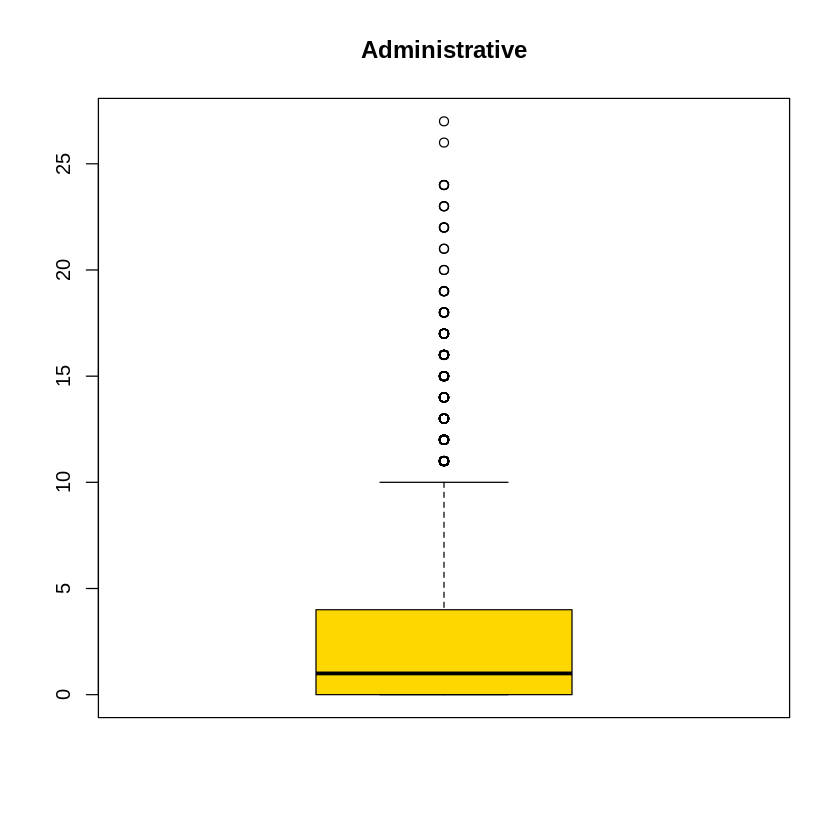

In [205]:
boxplot(df$`Administrative`, main= "Administrative", bowex=0.2, col= "gold")

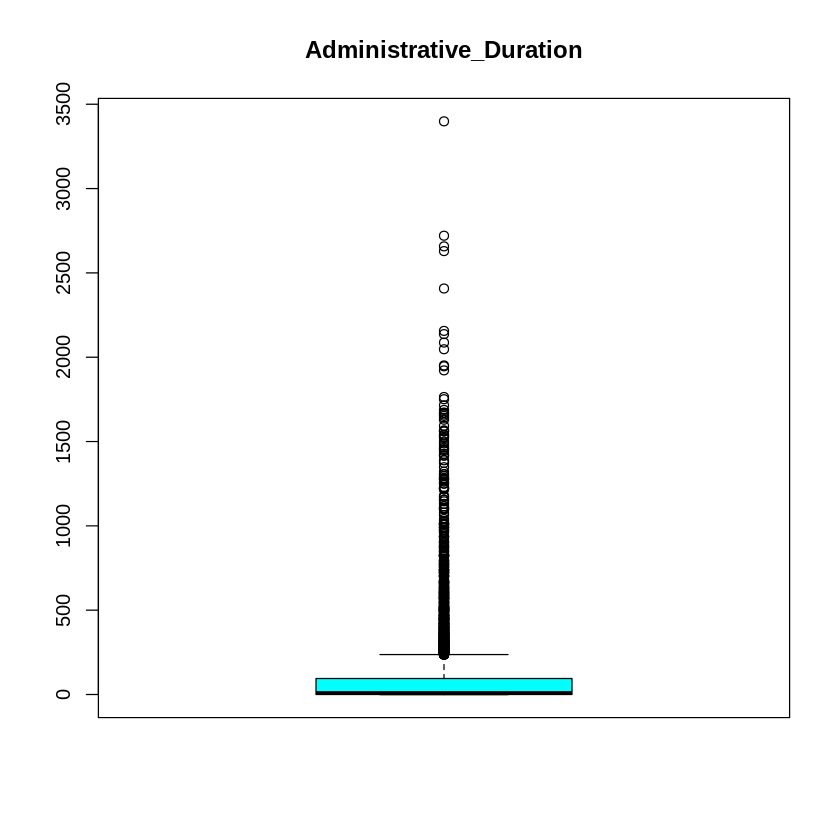

In [206]:
#Check for outliers in the  Administrative_Duration column
boxplot(df$`Administrative_Duration`, main= "Administrative_Duration", bowex=0.2, col= "cyan")

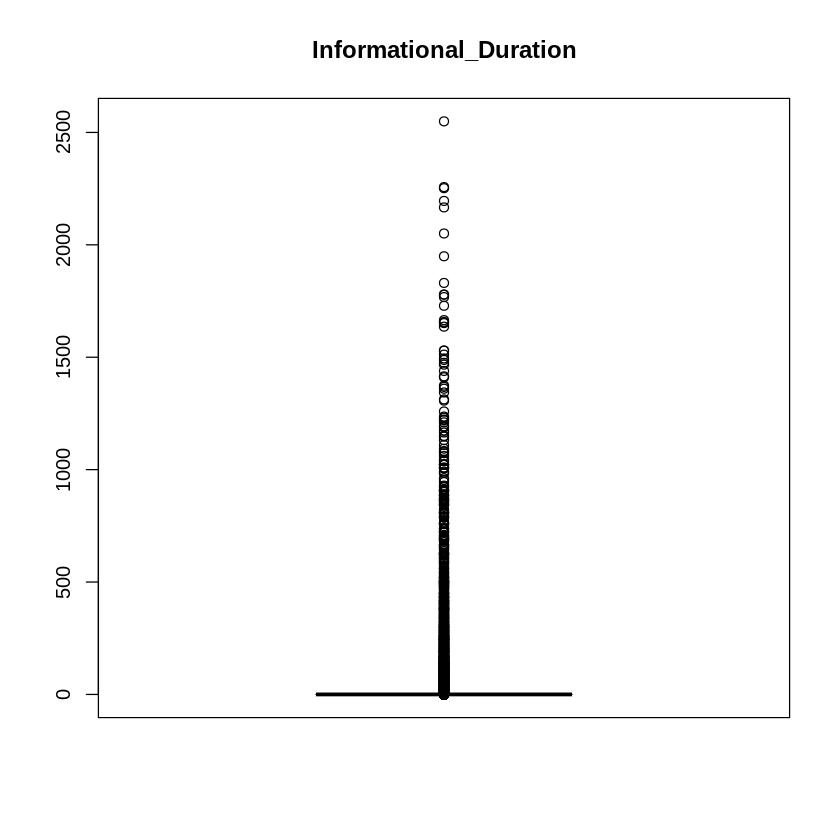

In [207]:
#Check for outliers in the  Informational_Duration column
boxplot(df$`Informational_Duration`, main= "Informational_Duration", bowex=0.2)

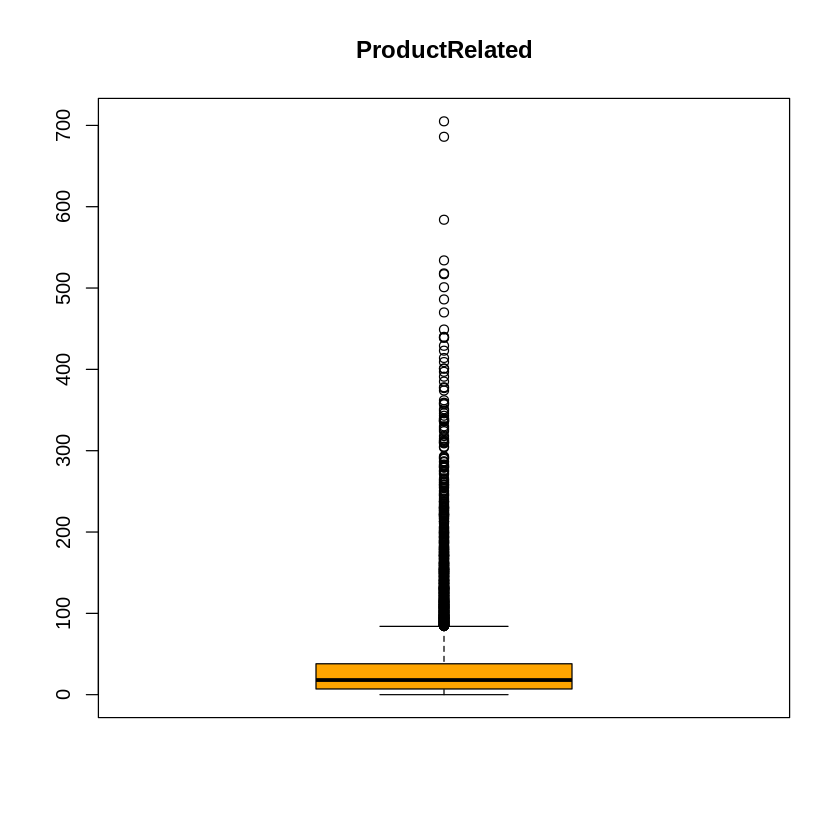

In [ ]:
boxplot(df$`ProductRelated`, main= "ProductRelated", bowex=0.2, col= "orange")

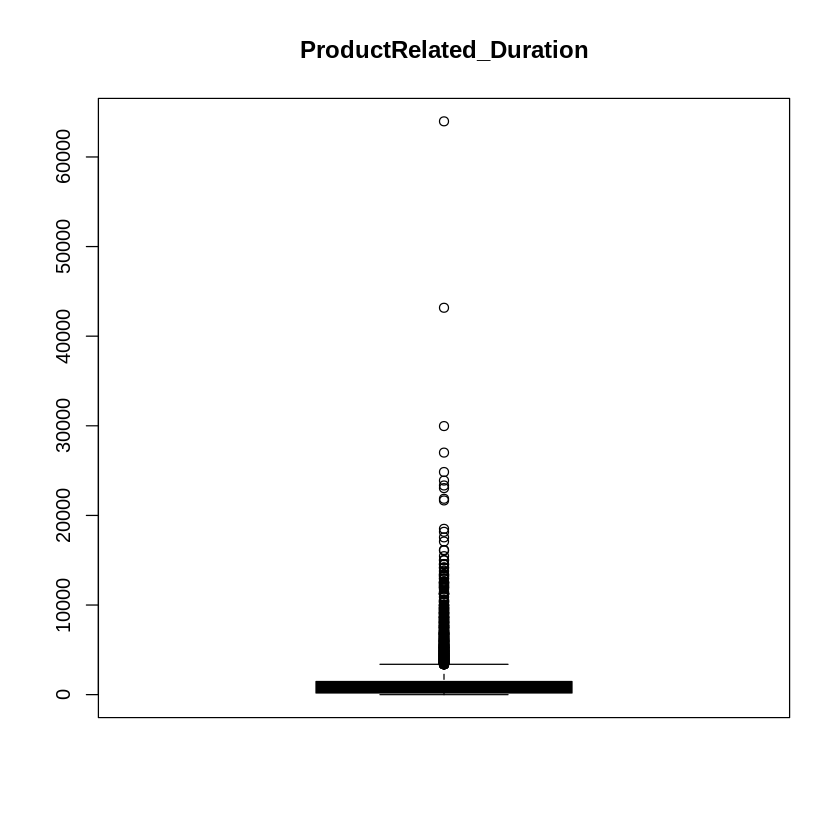

In [ ]:
boxplot(df$`ProductRelated_Duration`, main= "ProductRelated_Duration", bowex=0.2, col= "black")

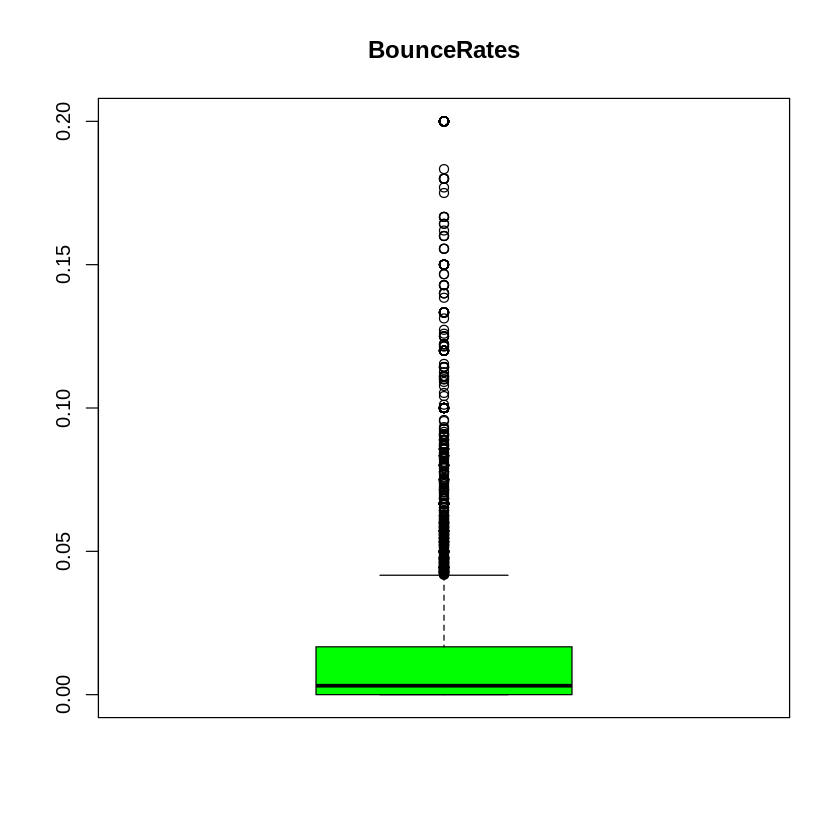

In [ ]:
boxplot(df$`BounceRates`, main= "BounceRates", bowex=0.2, col= "green")

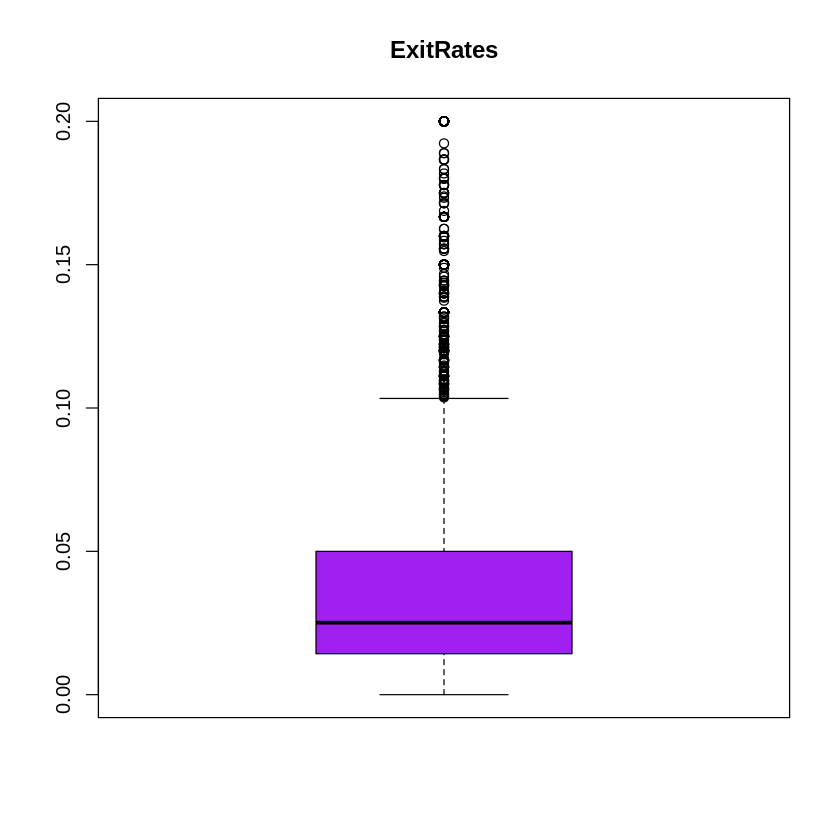

In [ ]:
boxplot(df$`ExitRates`, main= "ExitRates", bowex=0.2, col= "purple")

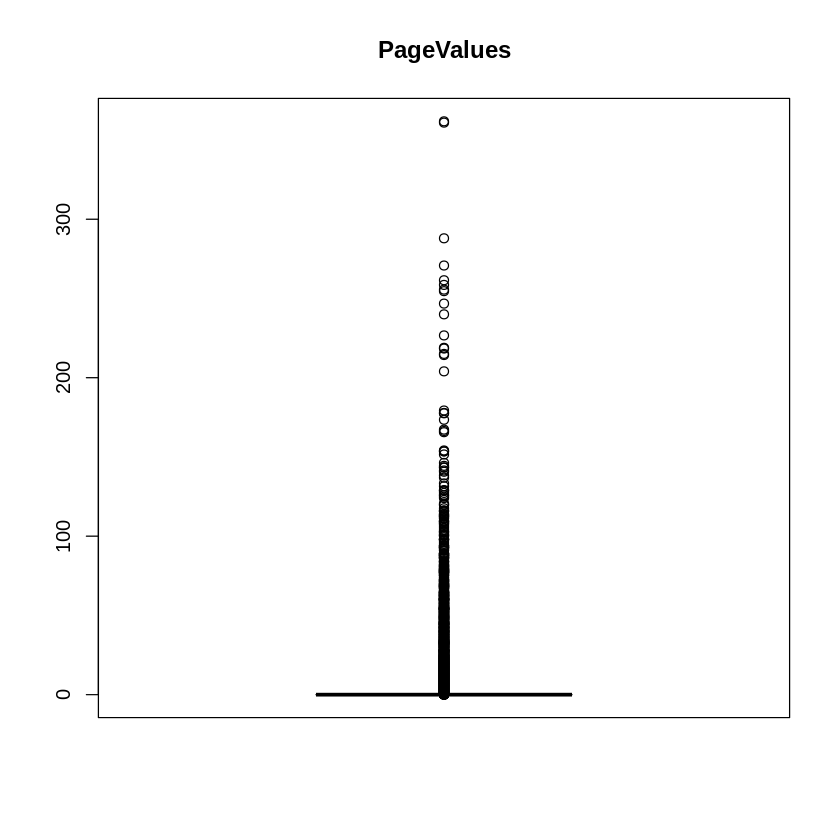

In [ ]:
boxplot(df$`PageValues`, main= "PageValues", bowex=0.2, col= "gold")

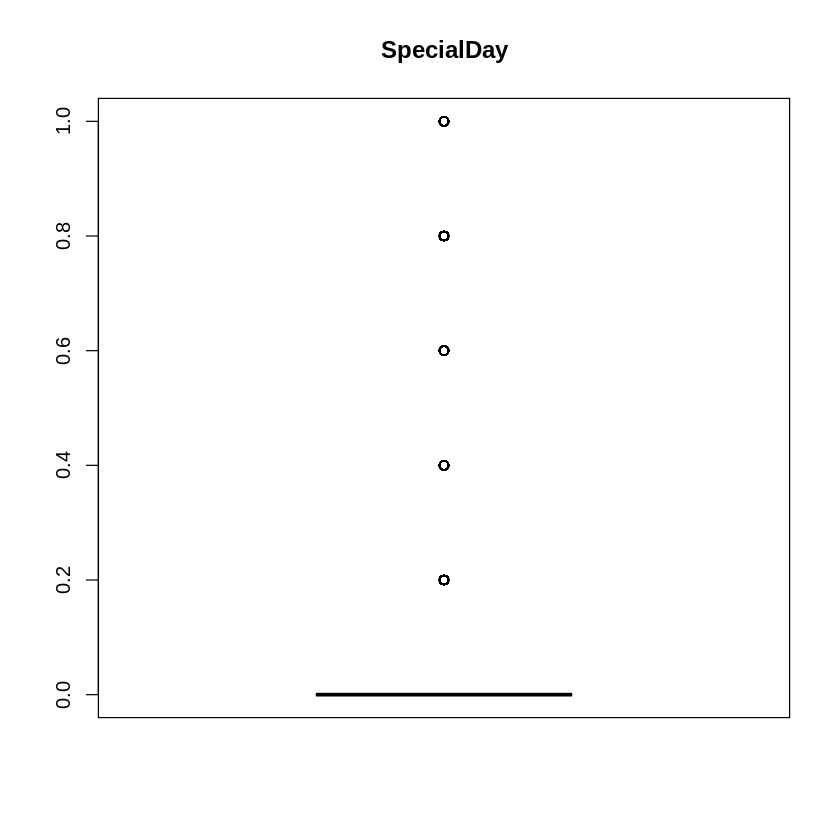

In [ ]:
boxplot(df$`SpecialDay`, main= "SpecialDay", bowex=0.2, col= "gold")

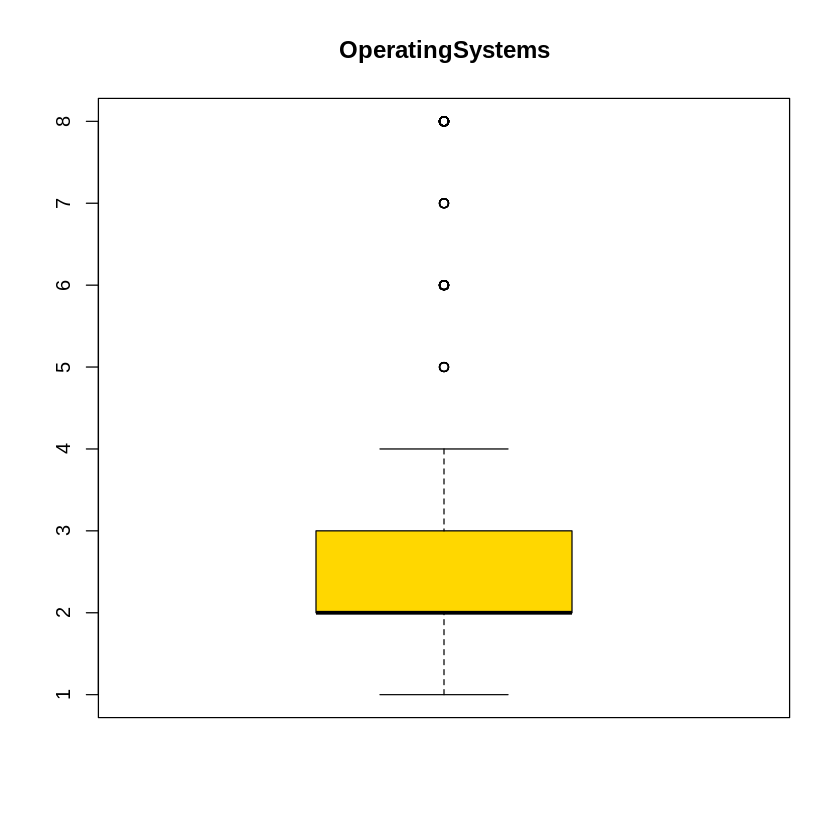

In [ ]:
boxplot(df$`OperatingSystems`, main= "OperatingSystems", bowex=0.2, col= "gold")

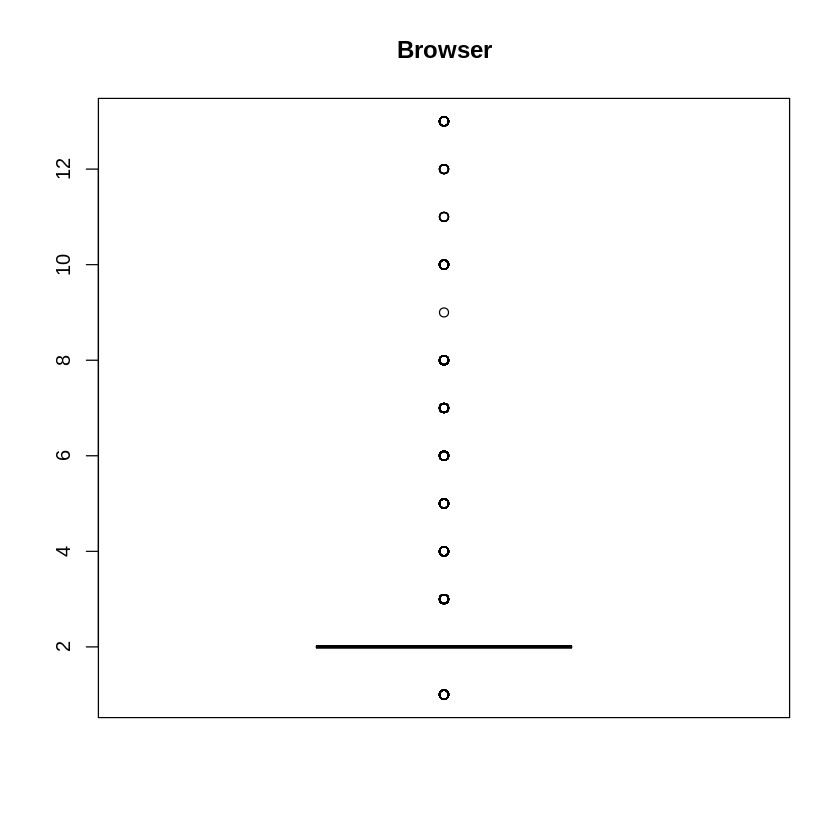

In [ ]:
boxplot(df$`Browser`, main= "Browser", bowex=0.2, col= "red")

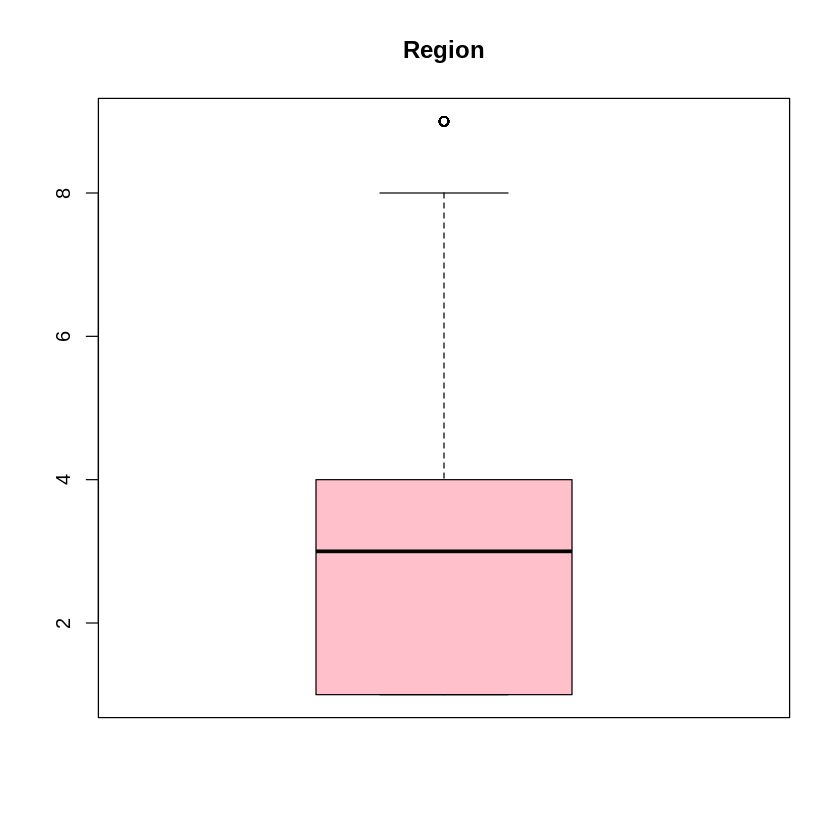

In [ ]:
boxplot(df$`Region`, main= "Region", bowex=0.2, col= "pink")

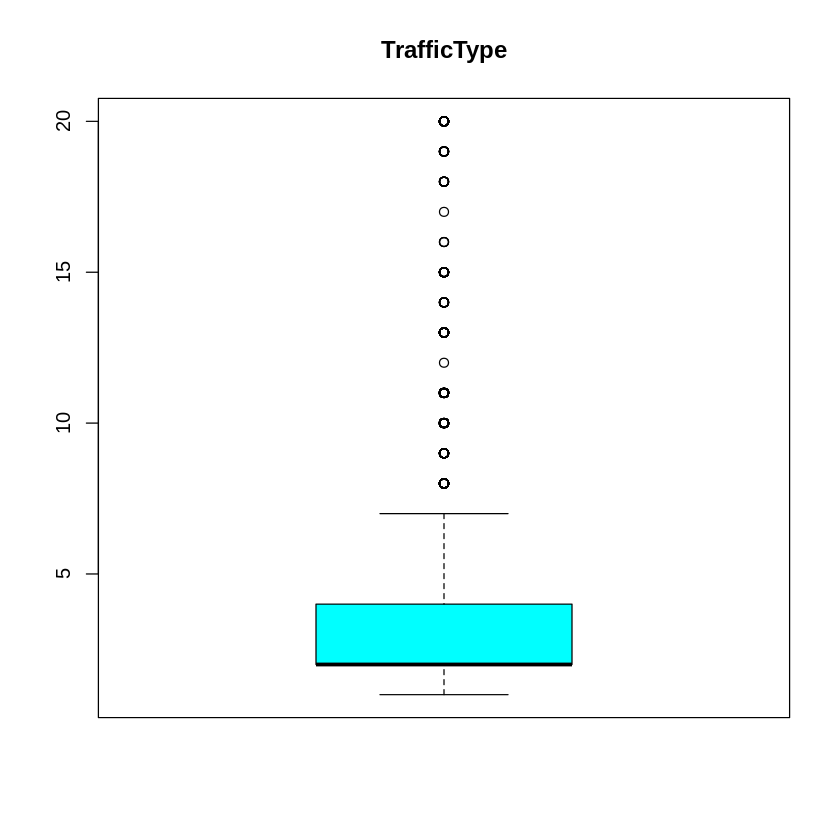

In [ ]:
boxplot(df$`TrafficType`, main= "TrafficType", bowex=0.2, col= "cyan")

Since, outliers are an important part of the dataset i have retained them and will transform them to map them to normal distribution.

#Univariate Analysis

###Administrative column

In [ ]:
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



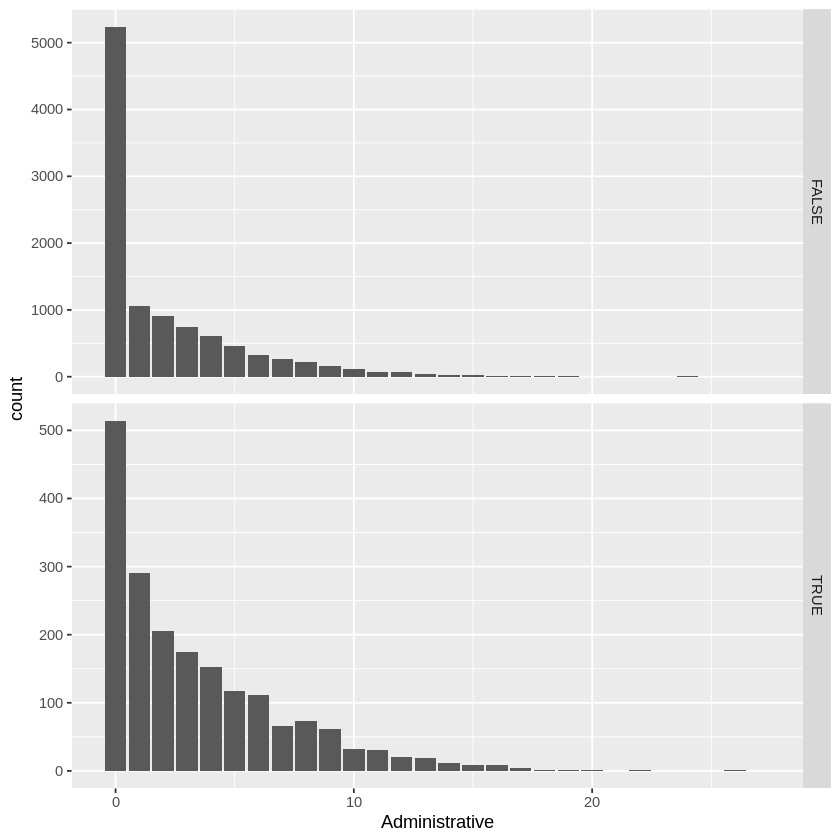

In [ ]:
#Bar plot of administrative column
df %>% 
  ggplot() +
  aes(x = Administrative) +
  geom_bar() +
  facet_grid(Revenue ~ .,
             scales = "free_y")

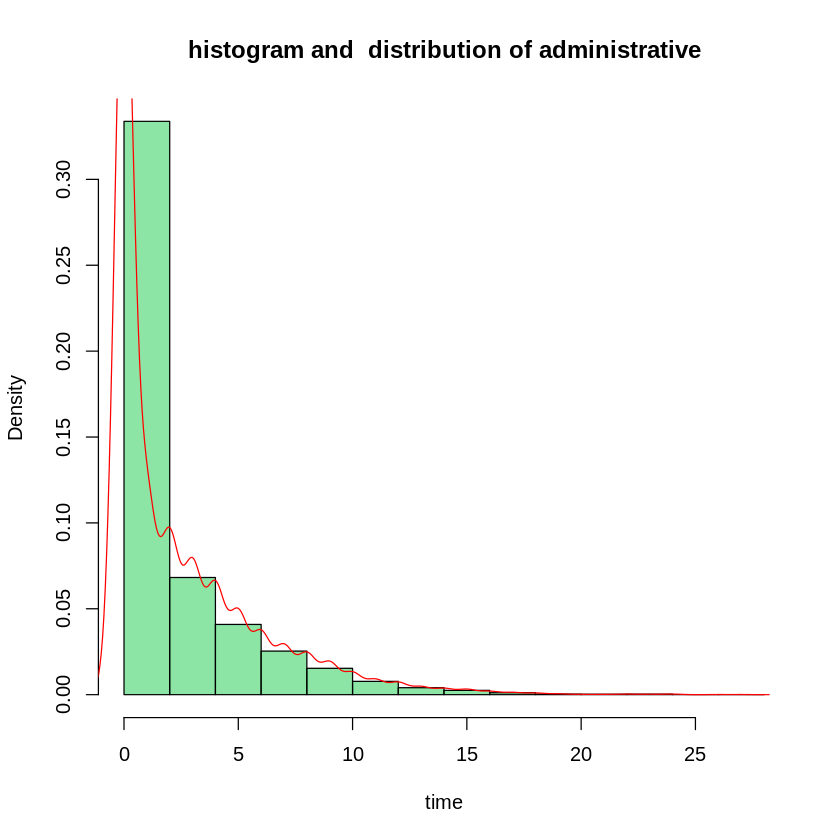

In [ ]:
#histogram of Administrative

Administrative <- df$`Administrative`
hist(Administrative, main = "histogram and  distribution of administrative", col=rgb(0.1,0.8,0.3,0.5), prob = TRUE,  )
lines(density(time), col = "red")

In [ ]:
### Mode is the observation that appears most frequently.
# function to get the mode
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

paste("mode:", getmode(df$Administrative))

[1] "mode: 0"

In [ ]:
# Variance 
# ---
# 
paste("variance:", var(df$Administrative))

[1] "variance: 11.0406933561827"

In [ ]:
#Standard Deviation
# ---
#

paste("std dev:", sd(df$Administrative))

[1] "std dev: 3.32275388137351"

In [ ]:
#Mean of administrative column
mean.adm<- mean(df$Administrative)
mean.adm

[1] 2.317798

In [ ]:
#Median
median.adm<- median(df$Administrative)
median.adm

[1] 1

In [ ]:
# Kurtosis
# ---
# 
paste("kurtosis:", kurtosis(df$Administrative))

[1] "kurtosis: 4.69078602462451"

In [ ]:
# Skewness
# ---
# 
paste("skewness:", skewness(df$Administrative))

[1] "skewness: 1.95839925848812"

In [ ]:
# Range
# ---
# 
paste("range:", range(df$Administrative))


[1] "range: 0"  "range: 27"

###Administrative_Duration

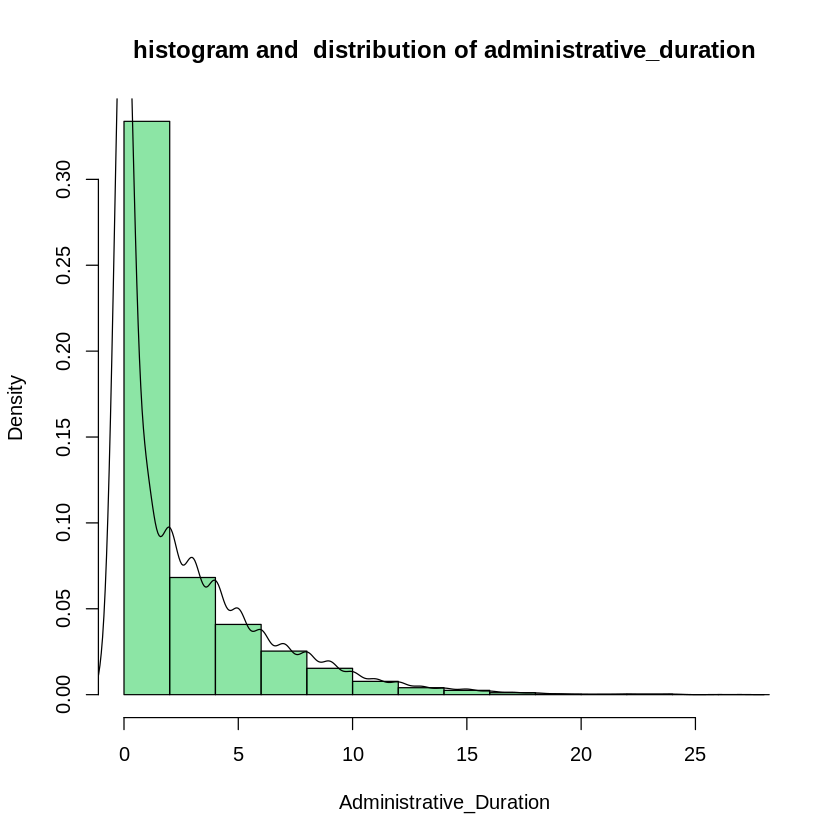

In [ ]:
#histogram  and density plot of administrative_duration

Administrative_Duration <- df$`Administrative`
hist(Administrative_Duration, main = "histogram and  distribution of administrative_duration", col=rgb(0.1,0.8,0.3,0.5), prob = TRUE,  )
lines(density(Administrative_Duration), col = "black")

In [ ]:
mode.Adm_d <- getmode(df$Administrative_Duration) # mode value of the administrative_duration
print(mode.Adm_d)


[1] 0


In [ ]:
# Variance (Administrative_Duration)

paste("variance:", var(df$Administrative_Duration))

[1] "variance: 31279.6124163681"

In [ ]:
# Standard Deviation (Administrative_Duration)
# ---
paste("std dev:", sd(df$Administrative_Duration))

[1] "std dev: 176.860432025844"

In [ ]:
#Mean  (Administrative column)
mean.adm_d<- mean(df$Administrative_Duration)
mean.adm_d

[1] 80.90618

In [ ]:
#Median (Administrative_Duration)
median.adm_d<- median(df$Administrative_Duration)
median.adm_d

[1] 8

In [ ]:
# Kurtosis  (Administrative_Duration)

paste("kurtosis:", kurtosis(df$Administrative_Duration))

[1] "kurtosis: 50.4782636229177"

In [ ]:
# Skewness (Administrative_Duration)

paste("skewness:", skewness(df$Administrative_Duration))

[1] "skewness: 5.61159388179501"

In [ ]:
# Range (Administrative_Duration)
paste("range:", range(df$Administrative_Duration))


[1] "range: -1"      "range: 3398.75"

###Exit Rates

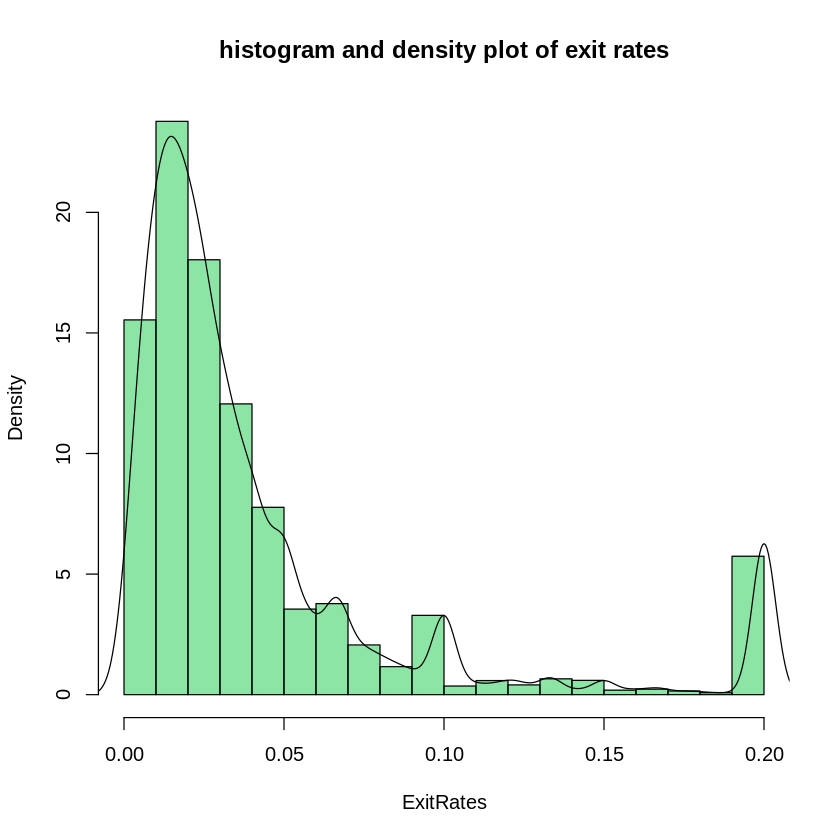

In [ ]:
#Histogram  and density plot of exit rates

ExitRates <- df$`ExitRates`
hist(ExitRates, main = "histogram and density plot of exit rates", col=rgb(0.1,0.8,0.3,0.5), prob = TRUE,  )
lines(density(ExitRates), col = "black")

In [ ]:
mode.exit <- getmode(df$ExitRates) # mode value of the exit rates
print(mode.exit)

[1] 0.2


In [ ]:
# Variance (Exitrates)

paste("variance:", var(df$ExitRates))

[1] "variance: 0.00235489882882249"

In [ ]:
# Standard Deviation (Exit rates)
# ---
paste("std dev:", sd(df$ExitRates))

[1] "std dev: 0.0485272998303274"

In [ ]:
#Mean  (Exit rates)
mean.exit <- mean(df$ExitRates)
mean.exit

[1] 0.04300254

In [ ]:
#Median (Exit rates)
median.e<- median(df$ExitRates)
median.e

[1] 0.02512449

In [ ]:
# Kurtosis  (Exit rates)

paste("kurtosis:", kurtosis(df$ExitRates))

[1] "kurtosis: 4.03673977442619"

In [ ]:
# Skewness (Exit rates)

paste("skewness:", skewness(df$ExitRates))

[1] "skewness: 2.15222888620743"

In [ ]:
# Range (Exit rates)
paste("range:", range(df$ExitRates))


[1] "range: 0"   "range: 0.2"

###ProductRelated

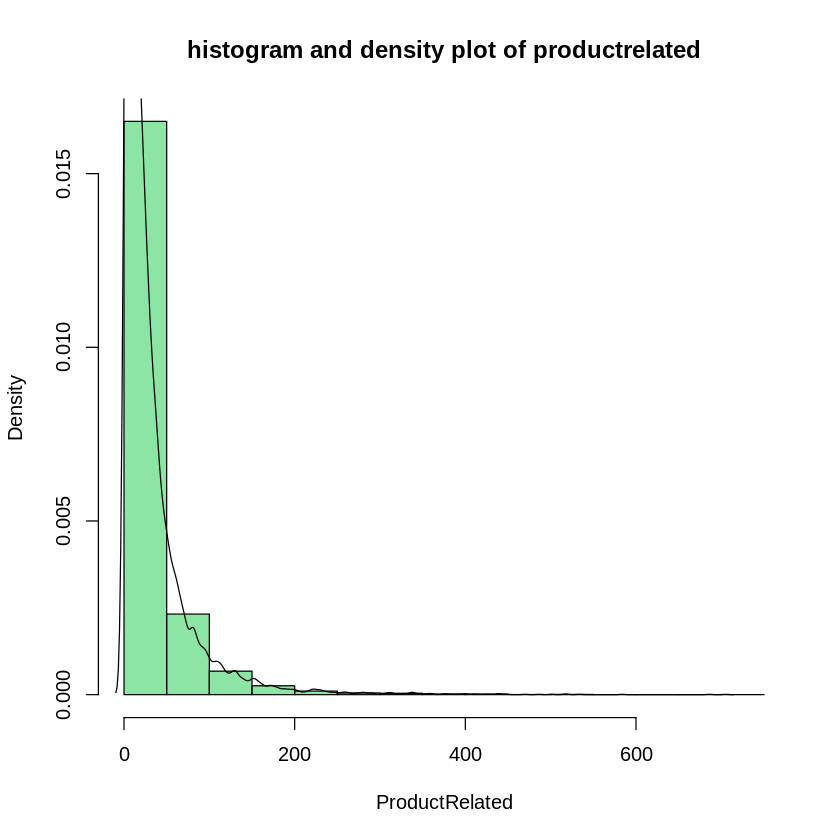

In [ ]:
#Histogram and density plot of productrelated

ProductRelated <- df$`ProductRelated`
hist(ProductRelated, main = "histogram and density plot of productrelated", col=rgb(0.1,0.8,0.3,0.5), prob = TRUE,  )
lines(density(ProductRelated), col = "black")

In [ ]:
mode.prd <- getmode(df$ProductRelated) # mode value of the productrelated
print(mode.prd)

[1] 1


In [ ]:
# Variance (Productrelated)

paste("variance:", var(df$ProductRelated))

[1] "variance: 1979.39028629893"

In [ ]:
# Standard Deviation (Productrelated)
# ---
paste("std dev:", sd(df$ProductRelated))

[1] "std dev: 44.4903392468402"

In [ ]:
#Mean  (Productrelated)
mean.prd<- mean(df$ProductRelated)
mean.prd

[1] 31.76388

In [ ]:
#Median (product related)
median.prd<- median(df$ProductRelated)
median.prd

[1] 18

In [ ]:
# Kurtosis  (Product related)

paste("kurtosis:", kurtosis(df$ProductRelated))

[1] "kurtosis: 31.1734028077753"

In [ ]:
# Skewness (product related)

paste("skewness:", skewness(df$ProductRelated))

[1] "skewness: 4.33916533185959"

In [ ]:
# Range (product related)
paste("range:", range(df$ProductRelated))


[1] "range: 0"   "range: 705"

###ProductRelated_Duration

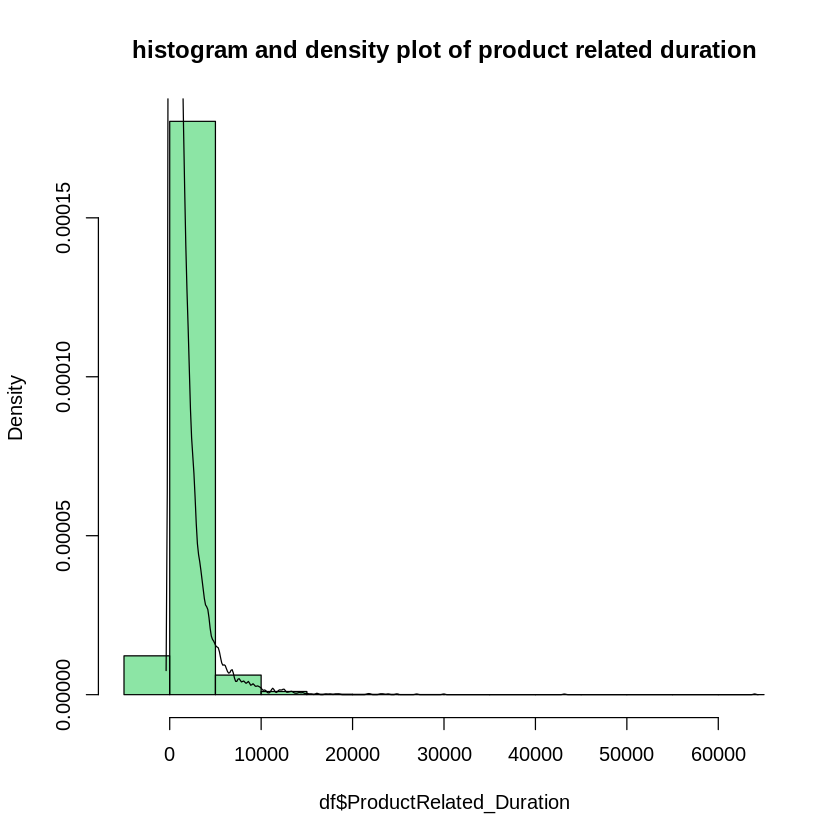

In [ ]:
#Histogram  and  density plot of productrelated duration
ProductRelated_Duration <- df$`ProductRelated_Duration`
hist(df$ProductRelated_Duration, main = "histogram and density plot of product related duration", col=rgb(0.1,0.8,0.3,0.5), prob = TRUE,  )
lines(density(ProductRelated_Duration), col = "black")

In [ ]:
mode.p <- getmode(df$ProductRelated_Duration) # mode value of the productrelated duration
print(mode.p)

[1] 0


In [ ]:
# Variance (product related duration)

paste("variance:", var(df$ProductRelated_Duration))

[1] "variance: 3664822.11030881"

In [ ]:
# Standard Deviation (product related duration)
# ---
paste("std dev:", sd(df$ProductRelated_Duration))

[1] "std dev: 1914.37251085279"

In [ ]:
#Mean  (product related duration)
mean.p<- mean(df$ProductRelated_Duration)
mean.p

[1] 1196.037

In [ ]:
#Median (product related duration)
median.p<- median(df$ProductRelated_Duration)
median.p

[1] 599.7662

In [ ]:
#Kurtosis (product related duration)

paste("kurtosis:", kurtosis(df$ProductRelated_Duration))

[1] "kurtosis: 137.028884470352"

In [ ]:
# Skewness (product related duration)

paste("skewness:", skewness(df$ProductRelated_Duration))

[1] "skewness: 7.25992277606072"

In [ ]:
# Range (product related duration)
paste("range:", range(df$ProductRelated_Duration))

[1] "range: -1"          "range: 63973.52223"

###BounceRates

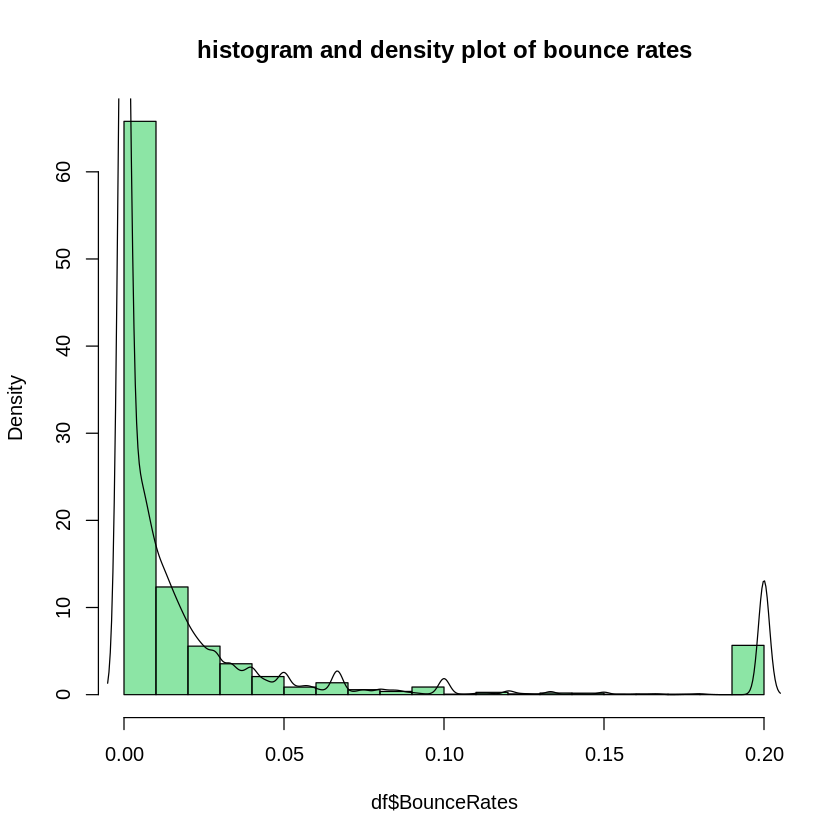

In [ ]:
#Histogram and  density plot of bouncerates
BounceRates <- df$`BounceRates`

hist(df$BounceRates, main = "histogram and density plot of bounce rates", col=rgb(0.1,0.8,0.3,0.5), prob = TRUE,  )
lines(density(BounceRates), col = "black")

In [ ]:
mode.b <- getmode(df$BounceRates) # mode value of the bounce rates
print(mode.b)

[1] 0


In [ ]:
# Variance (Bouncerates)

paste("variance:", var(df$BounceRates))

[1] "variance: 0.00234518677639196"

In [ ]:
# Standard Deviation (Bouncerates)
# ---
paste("std dev:", sd(df$BounceRates))

[1] "std dev: 0.0484271285168959"

In [ ]:
#Mean  (Bouncerates)
mean.b<- mean(df$BounceRates)
mean.b

[1] 0.02215246

In [ ]:
#Median (Bouncerates)
median.b<- median(df$BounceRates)
median.b

[1] 0.003119412

In [ ]:
#Kurtosis  (Bouncerates)

paste("kurtosis:", kurtosis(df$BounceRates))

[1] "kurtosis: 7.74895805476751"

In [ ]:
# Skewness (Bouncerates)

paste("skewness:", skewness(df$BounceRates))

[1] "skewness: 2.95174710710136"

In [ ]:
# Range (Bouncerates)
paste("range:", range(df$BounceRates))

[1] "range: 0"   "range: 0.2"

###Operating Systems

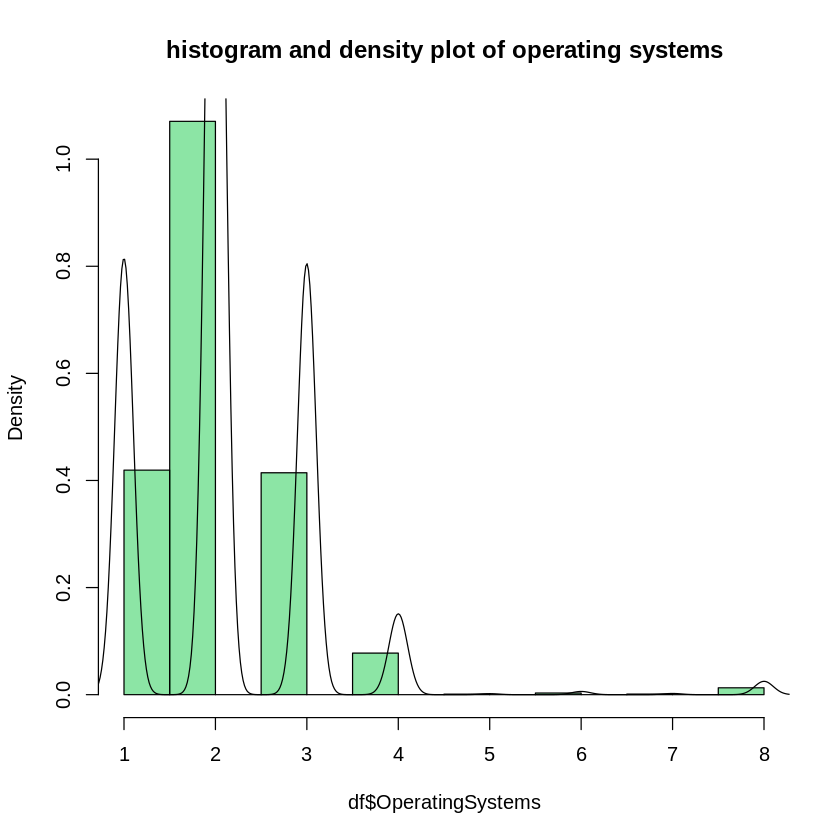

In [ ]:
#Histogram and  density plot of operating systems
OperatingSystems <- df$`OperatingSystems`
hist(df$OperatingSystems, main = "histogram and density plot of operating systems", col=rgb(0.1,0.8,0.3,0.5), prob = TRUE,  )
lines(density(OperatingSystems), col = "black")


In [ ]:
mode.o<- getmode(df$OperatingSystems) # mode value of the operating systems
print(mode.o)

[1] 2


In [ ]:
# Variance (Operating systems)
paste("variance:", var(df$OperatingSystems))

[1] "variance: 0.830952379068611"

In [ ]:
# Standard Deviation (Operating systems)
# ---
paste("std dev:", sd(df$OperatingSystems))

[1] "std dev: 0.911565893980578"

In [ ]:
#Mean  (Operating systems)
mean.o<- mean(df$OperatingSystems)
mean.o

[1] 2.124147

In [ ]:
#Median ( Operating systems)
median.o<- median(df$OperatingSystems)
median.o

[1] 2

In [ ]:
#Kurtosis  (Operating systems)

paste("kurtosis:", kurtosis(df$OperatingSystems))

[1] "kurtosis: 10.4489359209419"

In [ ]:
# Skewness (Operating systems)

paste("skewness:", skewness(df$OperatingSystems))

[1] "skewness: 2.0662684910092"

In [ ]:
# Range (Operating systems)
paste("range:", range(df$OperatingSystems))

[1] "range: 1" "range: 8"

###SpecialDay

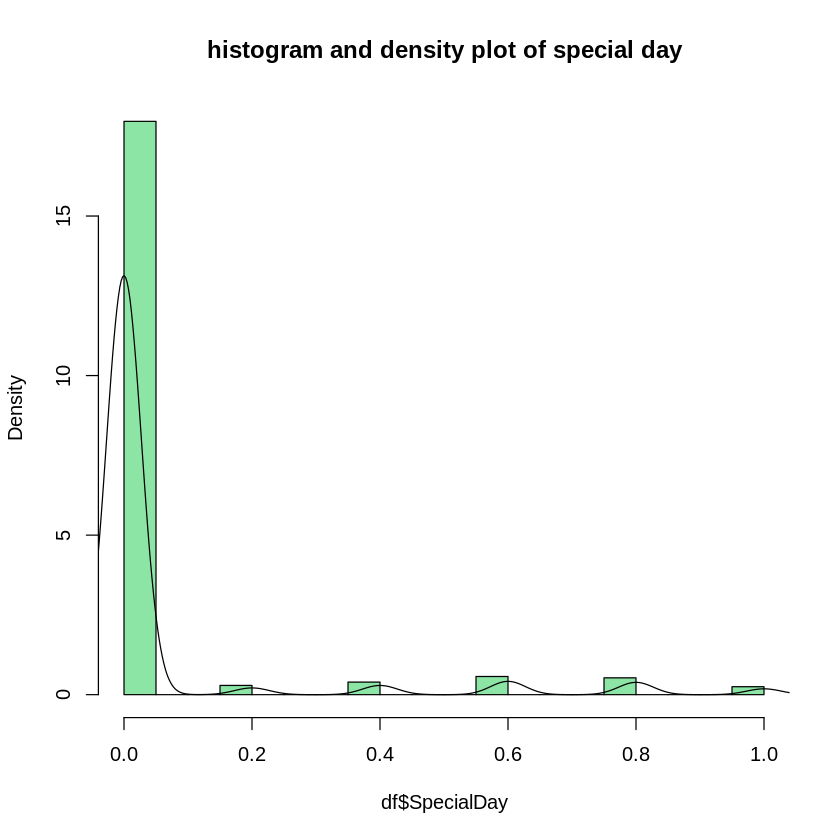

In [ ]:
#histogram of Special day
#Histogram and  density plot of special day
SpecialDay <- df$`SpecialDay`
hist(df$SpecialDay, main = "histogram and density plot of special day", col=rgb(0.1,0.8,0.3,0.5), prob = TRUE,  )
lines(density(SpecialDay), col = "black")


In [ ]:
mode.s <- getmode(df$SpecialDay) # mode value of the special day
print(mode.s)

[1] 0


In [ ]:
# Variance (special day)
paste("variance:", var(df$SpecialDay))

[1] "variance: 0.0396087690544976"

In [ ]:
# Standard Deviation (Special day)
# ---
paste("std dev:", sd(df$SpecialDay))

[1] "std dev: 0.199019519280139"

In [ ]:
#Mean  (Special day)
mean.s<- mean(df$SpecialDay)
mean.s

[1] 0.06149724

In [ ]:
#Median (Special day)
median.s<- median(df$SpecialDay)
median.s

[1] 0

In [ ]:
#Kurtosis  (Special day)

paste("kurtosis:", kurtosis(df$SpecialDay))

[1] "kurtosis: 9.89055535112668"

In [ ]:
# Skewness (Special day)

paste("skewness:", skewness(df$SpecialDay))

[1] "skewness: 3.29950535211984"

In [ ]:
# Range (Special day)
paste("range:", range(df$SpecialDay))

[1] "range: 0" "range: 1"

###Pagevalues

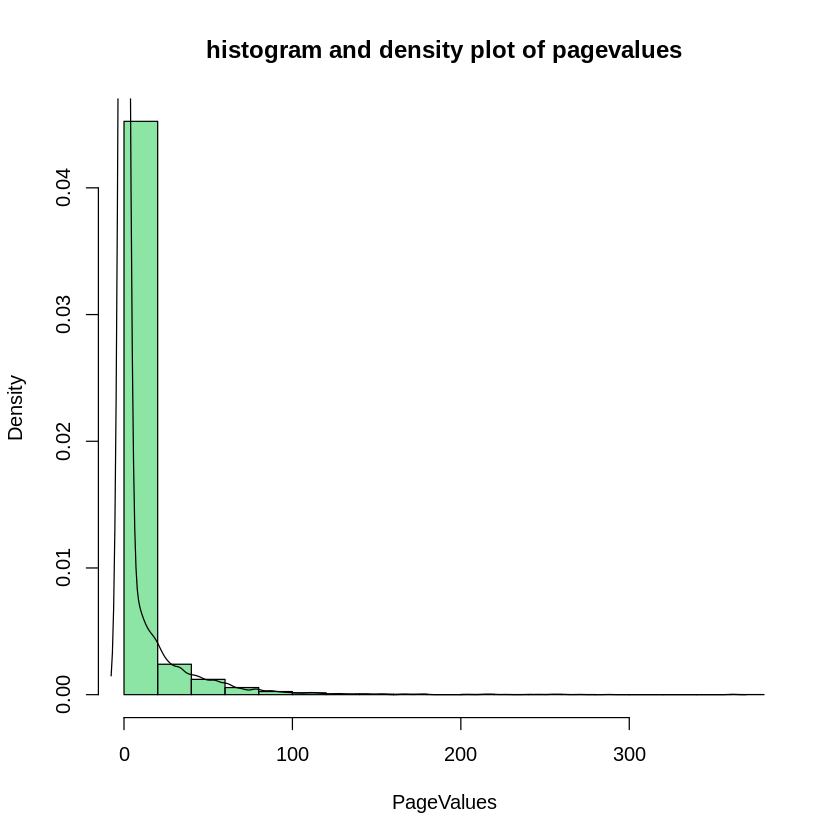

In [ ]:
#Histogram and  density plot of page values
PageValues <- df$`PageValues`
hist(PageValues, main = "histogram and density plot of pagevalues", col=rgb(0.1,0.8,0.3,0.5), prob = TRUE,  )
lines(density(PageValues), col = "black")


In [ ]:
mode.pg <- getmode(df$PageValues) # mode value of the page values
print(mode.pg)

[1] 0


In [ ]:
# Variance (page values)
paste("variance:", var(df$PageValues))

[1] "variance: 345.139326629667"

In [ ]:
# Standard Deviation (page values)
# ---
paste("std dev:", sd(df$PageValues))

[1] "std dev: 18.5779257892173"

In [ ]:
#Mean  (Page values)
mean.pg<- mean(df$PageValues)
mean.pg

[1] 5.895952

In [ ]:
#Kurtosis  (page values)

paste("kurtosis:", kurtosis(df$PageValues))

[1] "kurtosis: 65.5260333519371"

In [ ]:
# Skewness (Page values)

paste("skewness:", skewness(df$PageValues))


[1] "skewness: 6.37783596091336"

In [ ]:
# Range (page values)
paste("range:", range(df$PageValues))

[1] "range: 0"           "range: 361.7637419"

###Traffic Type

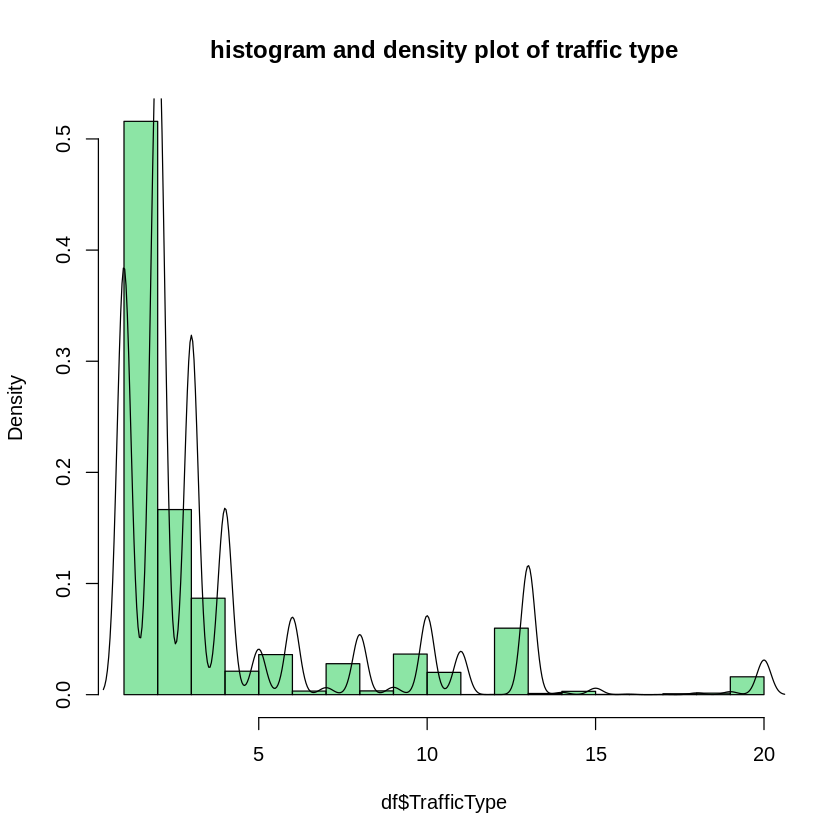

In [ ]:
#Histogram and  density plot of traffic type
TrafficType<- df$`TrafficType`
hist(df$TrafficType, main = "histogram and density plot of traffic type", col=rgb(0.1,0.8,0.3,0.5), prob = TRUE,  )
lines(density(TrafficType), col = "black")


In [218]:
#Mode for traffic type column
mode.t <- getmode(df$TrafficType) # mode value of the traffic type
print(mode.t)

[1] 2


In [219]:
# Variance (traffic type column)
paste("variance:", var(df$TrafficType))

[1] "variance: 16.1267517123029"

In [221]:
# Standard Deviation (traffic type column)
# ---
paste("std dev:", sd(df$TrafficType))

[1] "std dev: 4.01581270881785"

In [223]:
#Median (traffic type column)
median.t<- median(df$TrafficType)
median.t

[1] 2

In [224]:
#Kurtosis  (traffic type column)

paste("kurtosis:", kurtosis(df$TrafficType))

[1] "kurtosis: 3.46506739912327"

In [225]:
#Mean  (traffic type)
mean.t<- mean(df$TrafficType)
mean.t

[1] 4.074596

In [226]:
# Skewness (traffic type)

paste("skewness:", skewness(df$TrafficType))

[1] "skewness: 1.95828127980731"

In [228]:
# Range (traffic type)
paste("range:", range(df$TrafficType))

[1] "range: 1"  "range: 20"

###Region

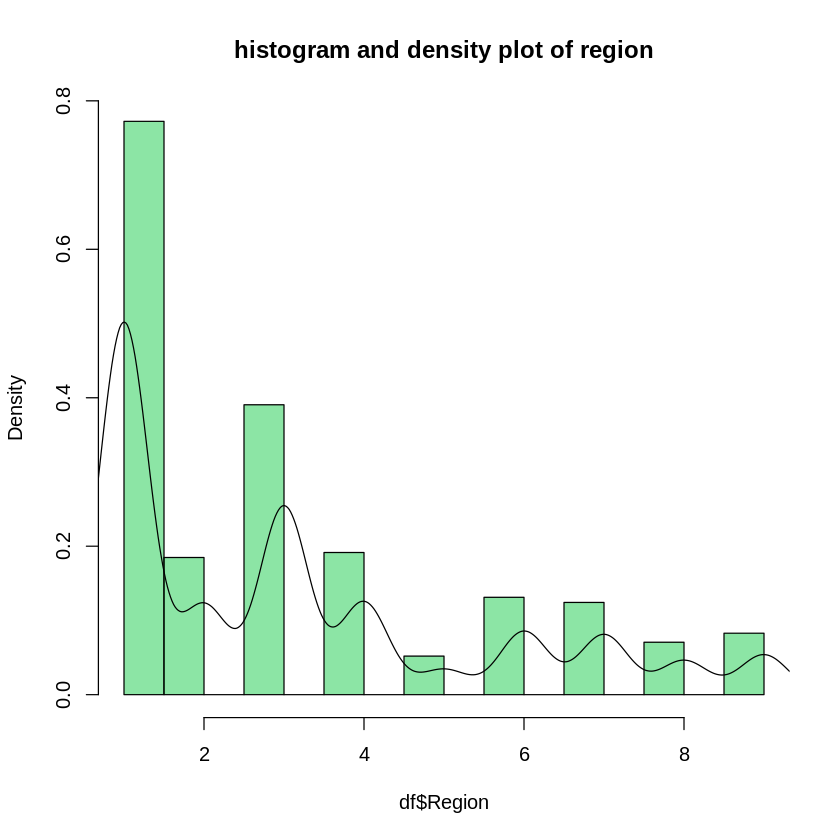

In [230]:
#Histogram and  density plot of region
Region <- df$`Region`
hist(df$Region, main = "histogram and density plot of region", col=rgb(0.1,0.8,0.3,0.5), prob = TRUE,  )
lines(density(Region), col = "black")


In [231]:
mode.r <- getmode(df$`Region`) # mode value of the region
print(mode.r)

[1] 1


In [232]:
# Variance (Region)
paste("variance:", var(df$Region))

[1] "variance: 5.77171219512844"

In [235]:
# Standard Deviation (Region)
# ---
paste("std dev:", sd(df$Region))

[1] "std dev: 2.40243880153656"

In [236]:
#Median (Region)
median.r<- median(df$Region)
median.r

[1] 3

In [237]:
#Kurtosis  (Region)

paste("kurtosis:", kurtosis(df$Region))

[1] "kurtosis: -0.160270347887721"

In [238]:
#Mean  (Region column)
mean.r<- mean(df$Region)
mean.r

[1] 3.153291

In [239]:
# Skewness (Region column)

paste("skewness:", skewness(df$Region))

[1] "skewness: 0.978610045881627"

In [240]:
# Range (Region)
paste("range:", range(df$Region))

[1] "range: 1" "range: 9"

###Informational

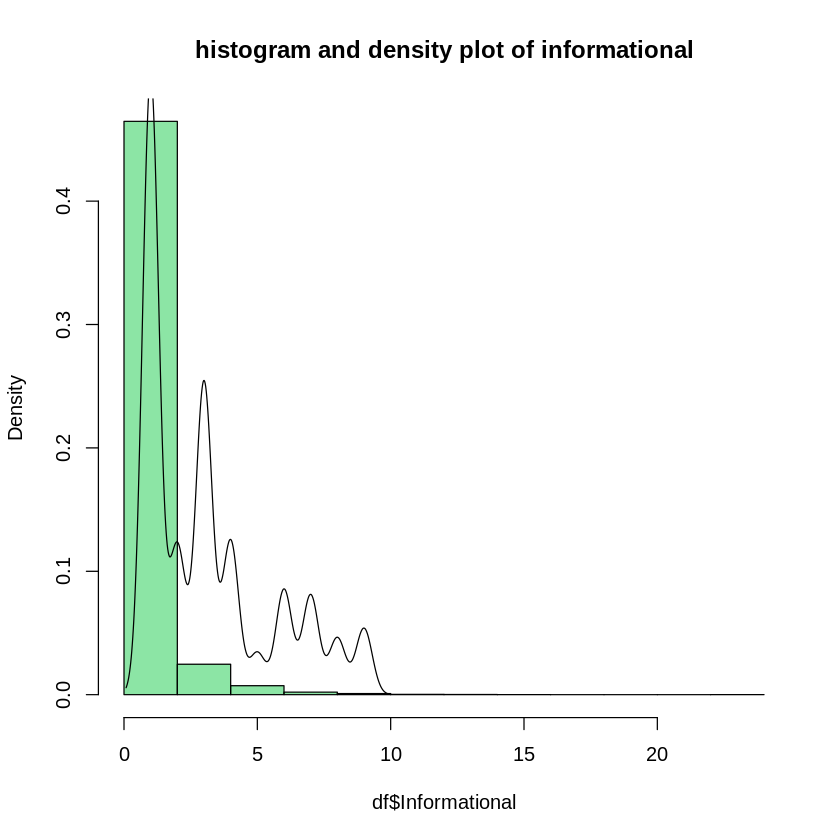

In [241]:
#histogram of informational
Informational <- df$`Informational`
hist(df$Informational, main = "histogram and density plot of informational", col=rgb(0.1,0.8,0.3,0.5), prob = TRUE,  )
lines(density(Region), col = "black")

In [242]:
mode.inf <- getmode(df$Informational) # mode value of informational
print(mode.inf)

[1] 0


In [245]:
# Variance (informational)
paste("variance:", var(df$Informational))

[1] "variance: 1.62770968099237"

In [246]:
# Standard Deviation (Informational)
# ---
paste("std dev:", sd(df$Informational))

[1] "std dev: 1.27581726003075"

In [247]:
#Median (Informational)
median.i<- median(df$Informational)
median.i

[1] 0

In [ ]:
#Kurtosis  (Informational)

paste("kurtosis:", kurtosis(df$Administrative_Duration))

In [250]:
#Mean  (Informational)
mean.Informational<- mean(df$Informational)
mean.Informational

[1] 0.5088122

In [249]:
# Skewness (Informational)

paste("skewness:", skewness(df$Informational))

[1] "skewness: 4.01295798060781"

In [ ]:
# Range (Administrative_Duration)
paste("range:", range(df$Administrative_Duration))


###Informational_Duration

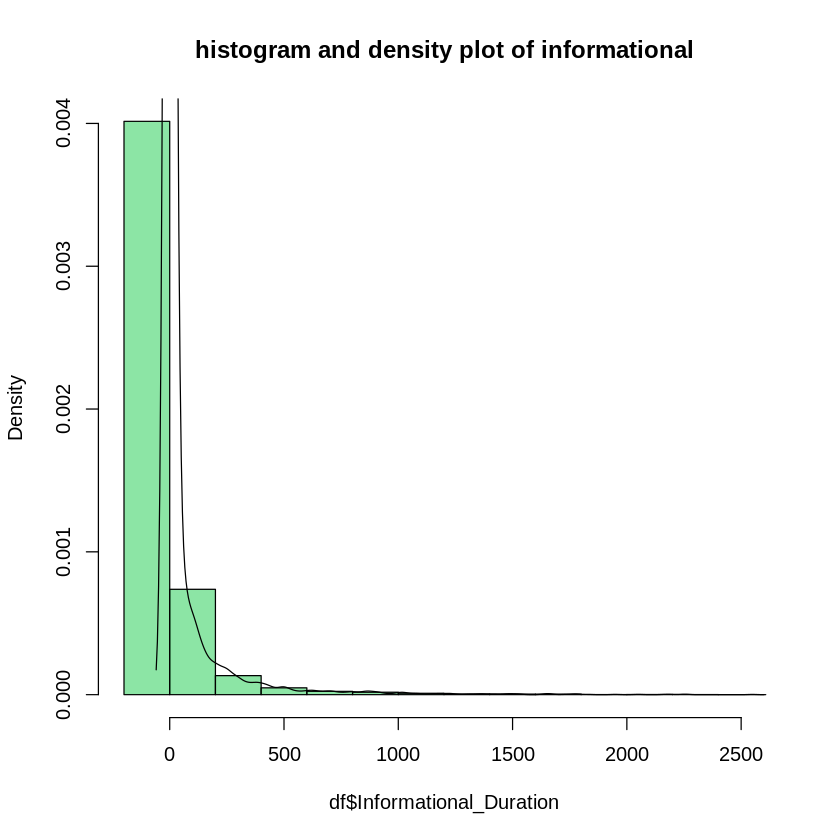

In [252]:
#histogram of informational_duration
Informational_Duration <- df$`Informational_Duration`
hist(df$Informational_Duration, main = "histogram and density plot of informational", col=rgb(0.1,0.8,0.3,0.5), prob = TRUE,  )
lines(density(Informational_Duration), col = "black")

In [253]:
mode.info <- getmode(df$Informational_Duration) # mode value of the exit rates
print(mode.info)

[1] 0


In [255]:
# Variance (Informational_Duration)
paste("variance:", var(df$Informational_Duration))

[1] "variance: 20010.5068641882"

In [257]:
# Standard Deviation (Informational_Duration)
# ---
paste("std dev:", sd(df$Informational_Duration))

[1] "std dev: 141.458498734393"

In [258]:
#Median (Informational_Duration)
median.inf_d<- median(df$Informational_Duration)
median.inf_d

[1] 0

In [ ]:
#Kurtosis  (Administrative_Duration)

paste("kurtosis:", kurtosis(df$Administrative_Duration))

In [ ]:
#Mean  (Administrative column)
mean.adm_d<- mean(df$Administrative_Duration)
mean.adm_d

In [261]:
#Skewness (Informational_Duration)

paste("skewness:", skewness(df$Informational_Duration))

[1] "skewness: 7.53650786729988"

In [259]:
# Range (Informational_Duration)
paste("range:", range(df$Informational_Duration))

[1] "range: -1"       "range: 2549.375"

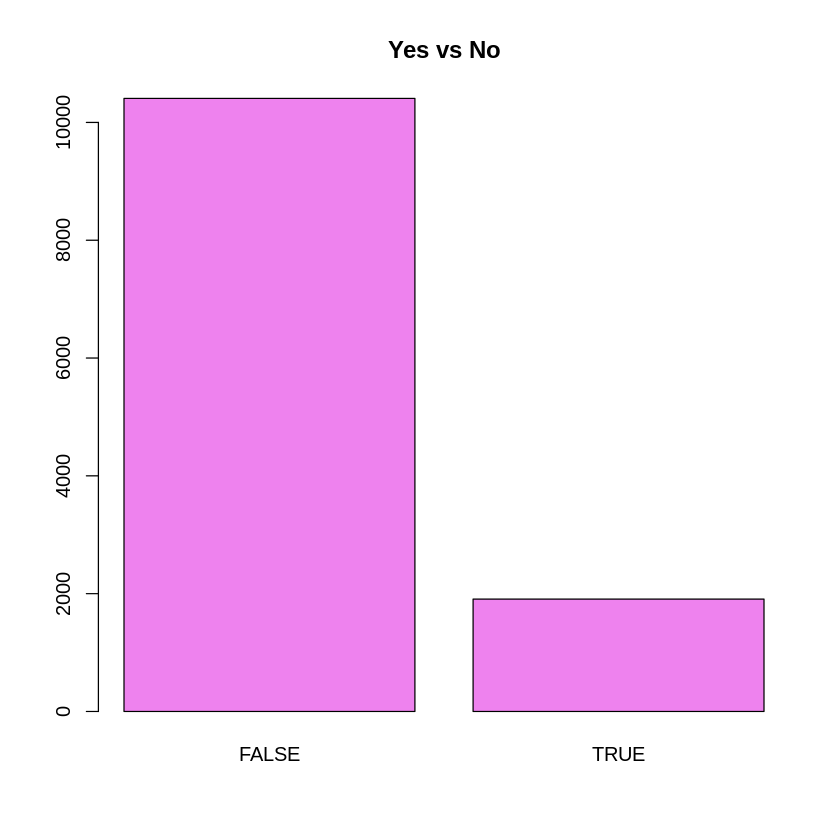

In [ ]:
#Barplot of Revenue column
Revenue <- df$Revenue
Rev_f <- table(Revenue)
barplot(Rev_f, col = "violet")
title("Yes vs No")


As we observe from the plot above, visualize, the revenue column is highly imbalanced. Most of the customers have not made any transaction. 



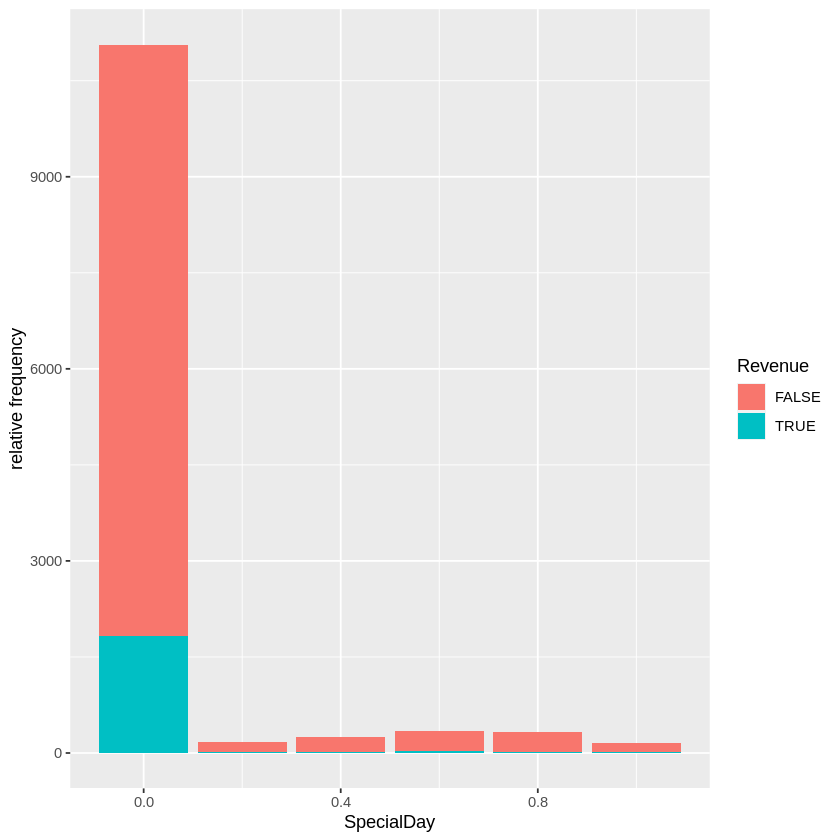

In [ ]:
df %>% 
  ggplot() +
  aes(x = SpecialDay, Revenue = ..count../nrow(df), fill = Revenue) +
  geom_bar() +
  ylab("relative frequency")

Most of the revenue generated is on days that are not special.This does make sense as special days are not too many in the year as compared to special days.



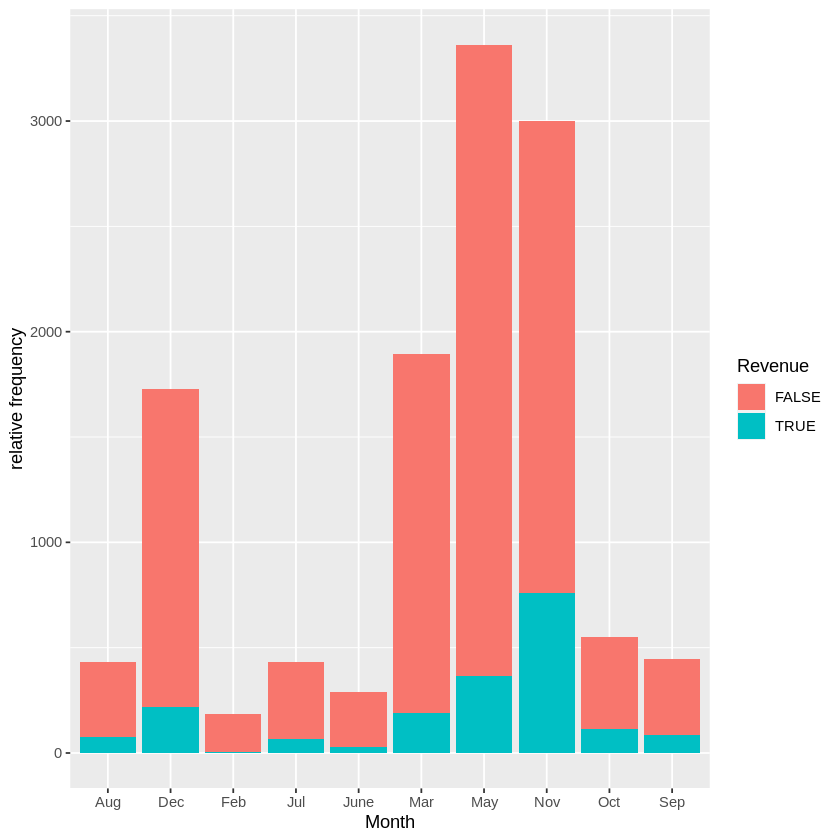

In [ ]:
#Barplot of month
df %>% 
  ggplot() +
  aes(x = Month, Revenue = ..count../nrow(df), fill = Revenue) +
  geom_bar() +
  ylab("relative frequency")

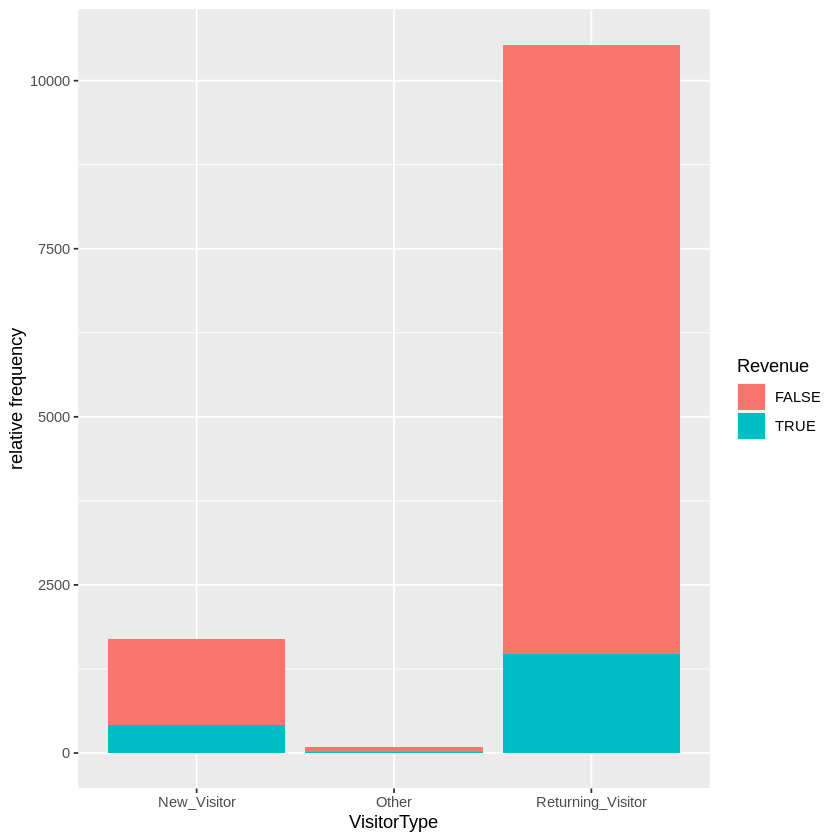

In [ ]:
#Bar plot of Visitor type.
df %>% 
  ggplot() +
  aes(x = VisitorType, Revenue = ..count../nrow(df), fill = Revenue) +
  geom_bar() +
  ylab("relative frequency")

There are 3 different types of visitors: Returning Visitors, New Visitors and Others.We observe that number of new visitors are very less as compared to returning visitors. 

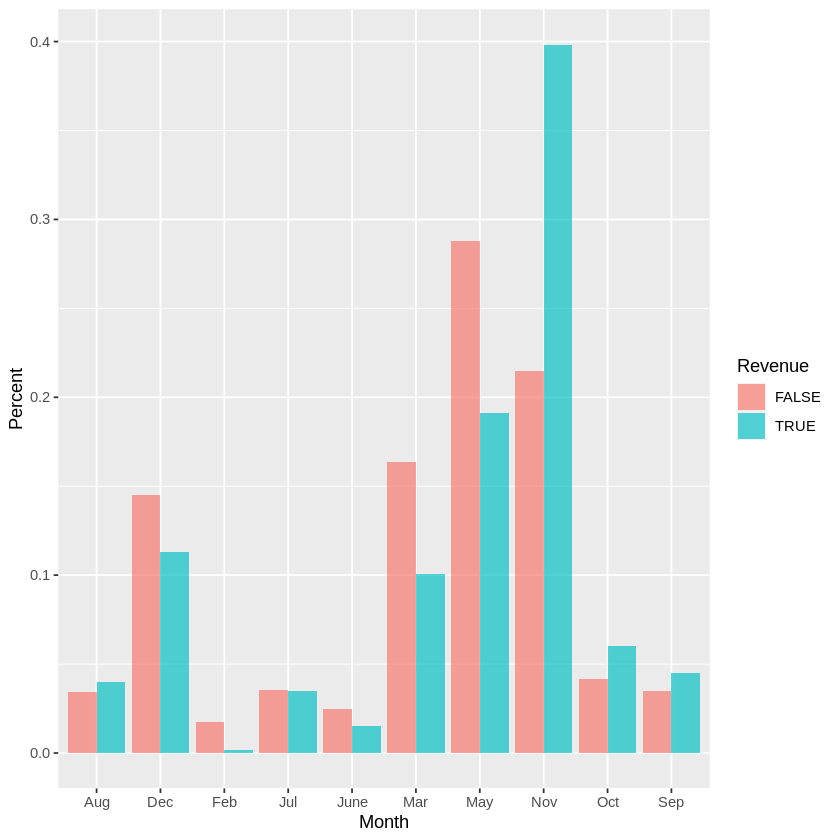

In [ ]:
month_table <- table(df$Month, df$Revenue)
month_tab <- as.data.frame(prop.table(month_table, 2))
colnames(month_tab) <-  c("Month", "Revenue", "perc")

ggplot(data = month_tab, aes(x = Month, y = perc, fill = Revenue)) + 
  geom_bar(stat = 'identity', position = 'dodge', alpha = 2/3) + 
  xlab("Month")+
  ylab("Percent")

From the plot above visitors were highest in the months of  November,May, March, and December.November has  the maximum  revenue generation while February has the least contribution.



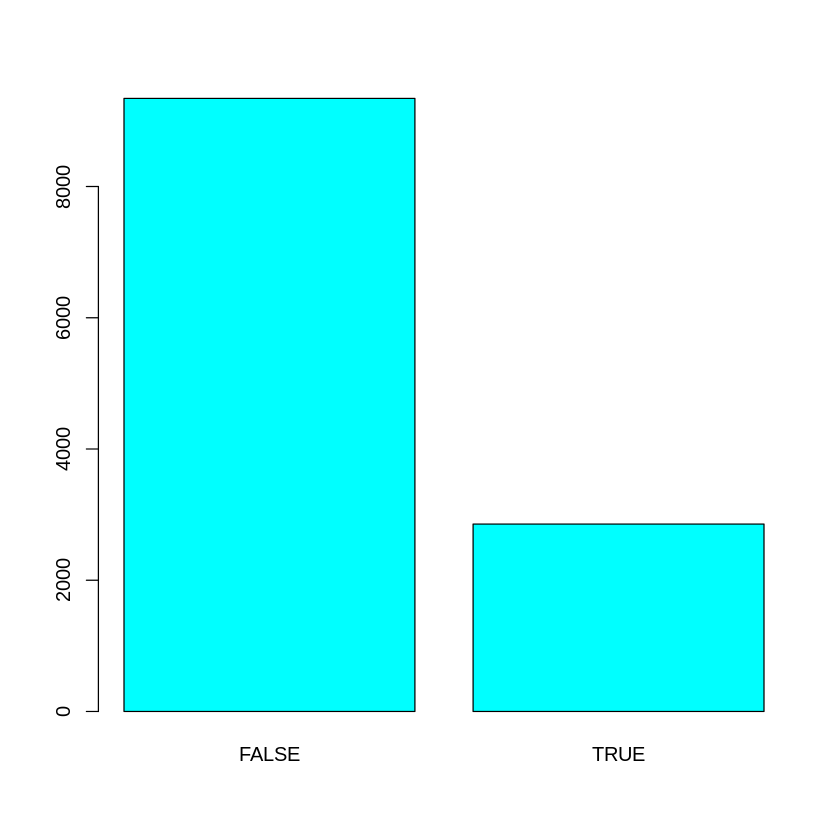

In [266]:
#Bar plot of weekend
Weekend_freq<- table(df$`Weekend`) 
barplot(Weekend_freq,col = "cyan")

The count for non weekends is higher than weekends.
Lets color with revenue and draw more insights.

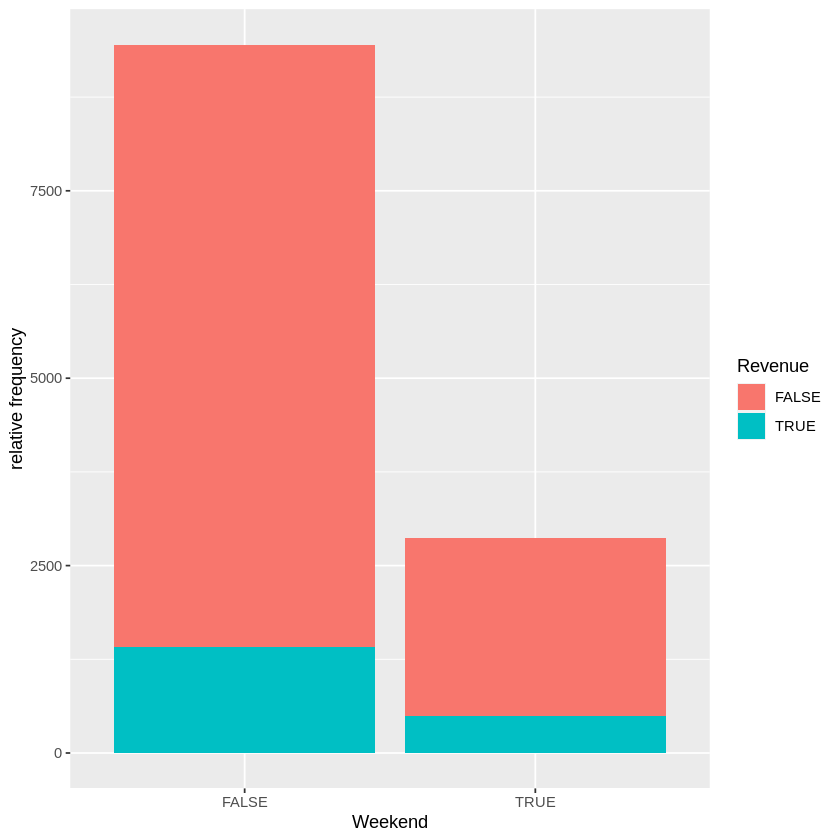

In [185]:
df %>% 
  ggplot() +
  aes(x = Weekend, Revenue = ..count../nrow(df), fill = Revenue) +
  geom_bar() +
  ylab("relative frequency") 

From the plot visitors like to be active on weekdays more than on weekends. Revenue generation is slightly higher on weekends. 

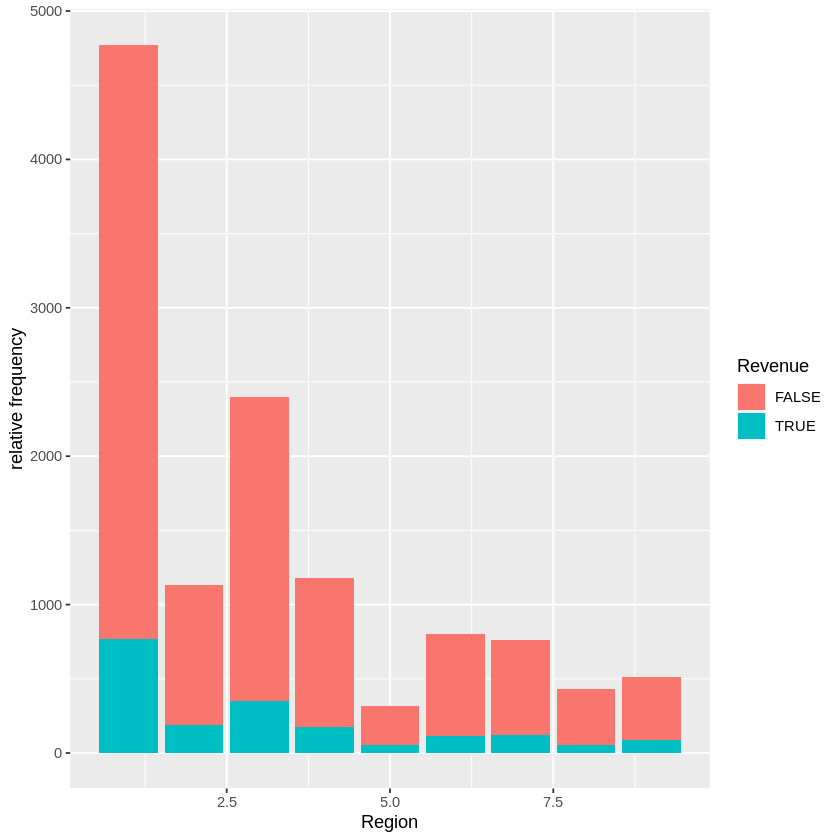

In [ ]:
df %>% 
  ggplot() +
  aes(x = Region, Revenue = ..count../nrow(df), fill = Revenue) +
  geom_bar() +
  ylab("relative frequency")

The highest count/frequency the customers are from region 1, 3, 4, and 2 respectively and only customers from region 1 and 3 are contributing maximum in revenue generation. More efforts needs to be made in the region 2 and 4 to increase the revenue generation. 

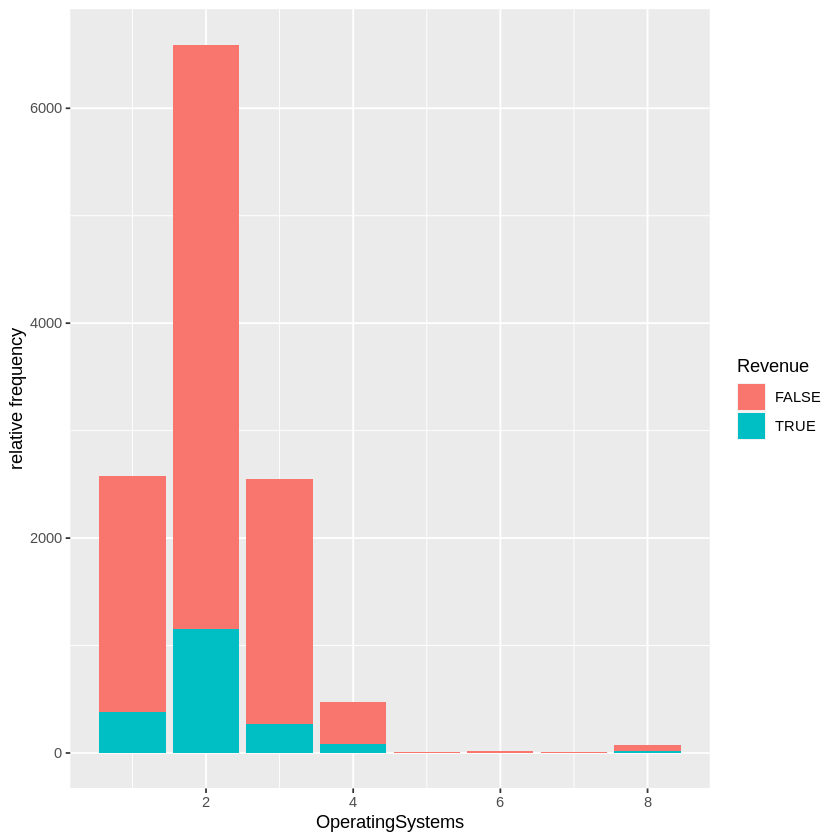

In [ ]:
df %>% 
  ggplot() +
  aes(x = OperatingSystems, Revenue = ..count../nrow(df), fill = Revenue) +
  geom_bar() +
  ylab("relative frequency")

Revenue generation is higher on operating system type 2 in when compared with type 1 and 3.The highest count the visitors have operating systems ( 2, 1, and 3 )respectively. 

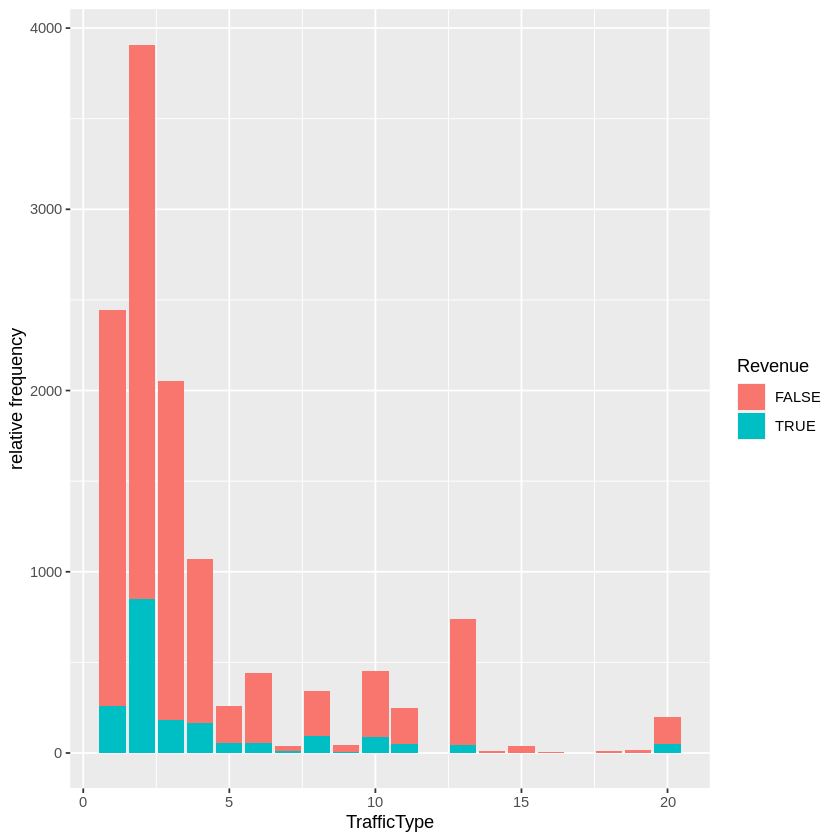

In [176]:
df %>% 
  ggplot() +
  aes(x = TrafficType, Revenue = ..count../nrow(df), fill = Revenue) +
  geom_bar() +
  ylab("relative frequency")

The highest percentage of the revenue generation is from Traffic Types 2, 1, 3, 4, and 13 respectively. 
Overall, Traffic Type 2 has contributed more in the revenue generation other traffic types. 
Traffic Types 12, 15, 17 and 18 has zero contribution in revenue generation. The company must look up what these traffic types corresponds to in real terms so that either they can improve the digital marketing if it corresponds to ads, social media etc. or ignore it if it is coming from something non-relevant. 


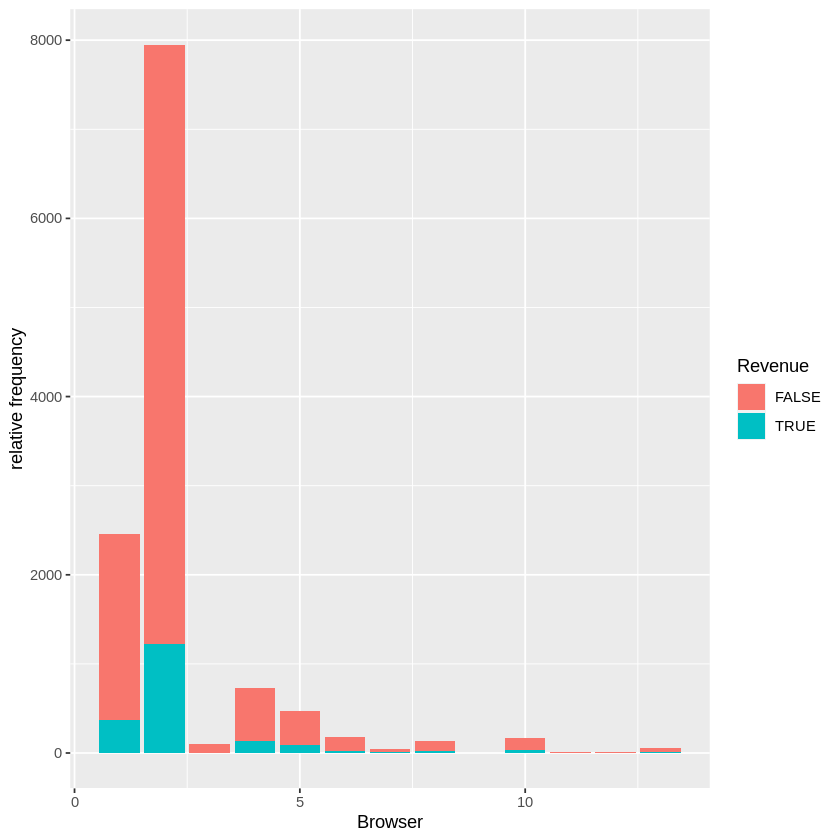

In [177]:
df %>% 
  ggplot() +
  aes(x = Browser, Revenue = ..count../nrow(df), fill = Revenue) +
  geom_bar() +
  ylab("relative frequency")

The highest frequency of the visitors are use Browser ( 2 and 1 )respectively. Apart from browser type 4 and 5, all other browsers have very less usage rate. 



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



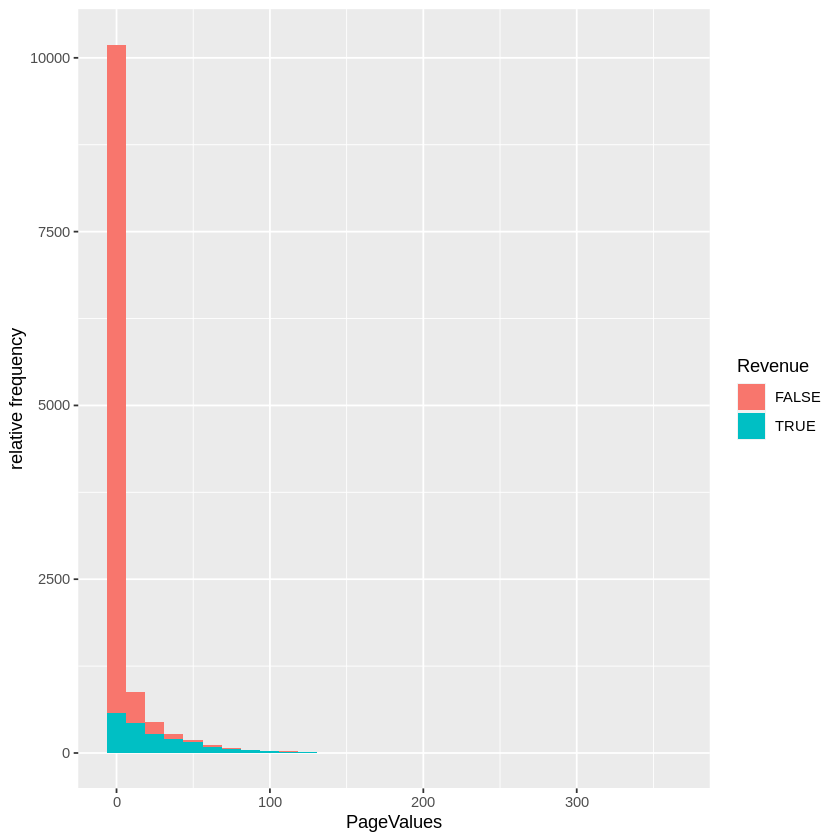

In [195]:
df %>% 
  ggplot() +
  aes(x = PageValues, Revenue = ..count../nrow(df), fill = Revenue) +
  geom_histogram() +
  ylab("relative frequency")

An increase in page values increases the revenue generated.Some pages may have very less page values which may lead to less revenue. 

#Bivariate Analysis

In [ ]:
#Lets manipulate the month column to do more analysis
library(plyr)
df$VisitorType <- factor(df$VisitorType, order = TRUE, levels = c('Returning_Visitor', 'Other', 'New_Visitor'))
df$VisitorType_new <-mapvalues(df$VisitorType, from = c("Returning_Visitor", "Other", "New_Visitor"), to = c(1,2,3))
df$Month <- factor(df$Month, order = TRUE, levels =c('Feb', 'Mar', 'May', 'June','Jul', 'Aug', 'Sep','Oct', 'Nov','Dec'))
df$Month_new <-mapvalues(df$Month, from = c('Feb', 'Mar', 'May', 'June','Jul', 'Aug', 'Sep','Oct', 'Nov','Dec'), to = c(1,2,3,4,5,6,7,8,9,10))


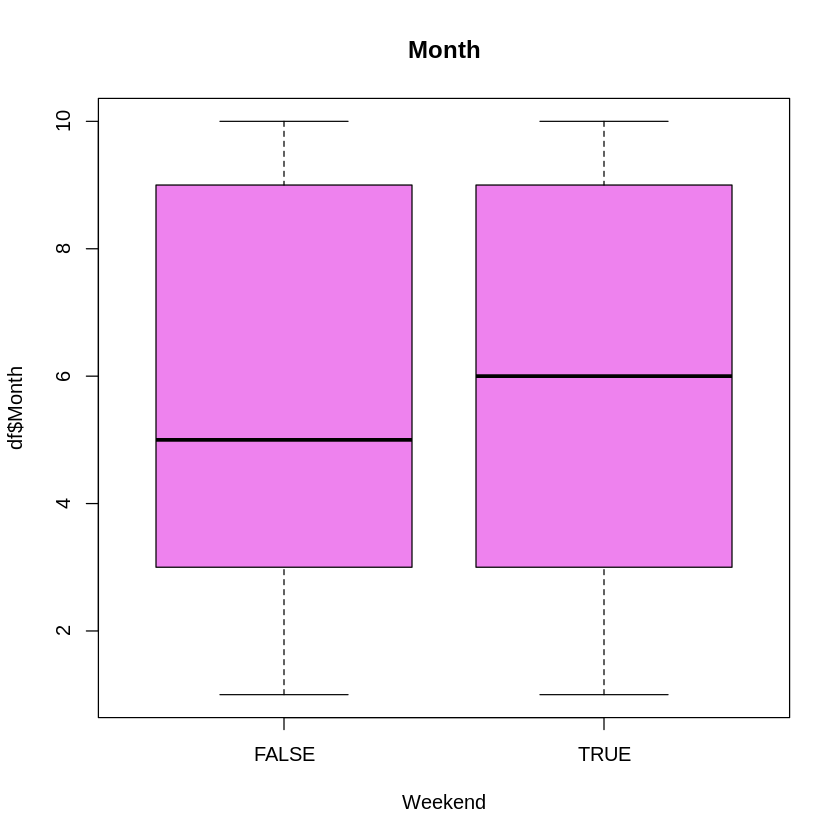

In [ ]:
#A boxplot for Month and weekend.
boxplot(df$Month~Weekend, data = df, main="Month",col= "violet")

The 6th month is August and has the most weekends.

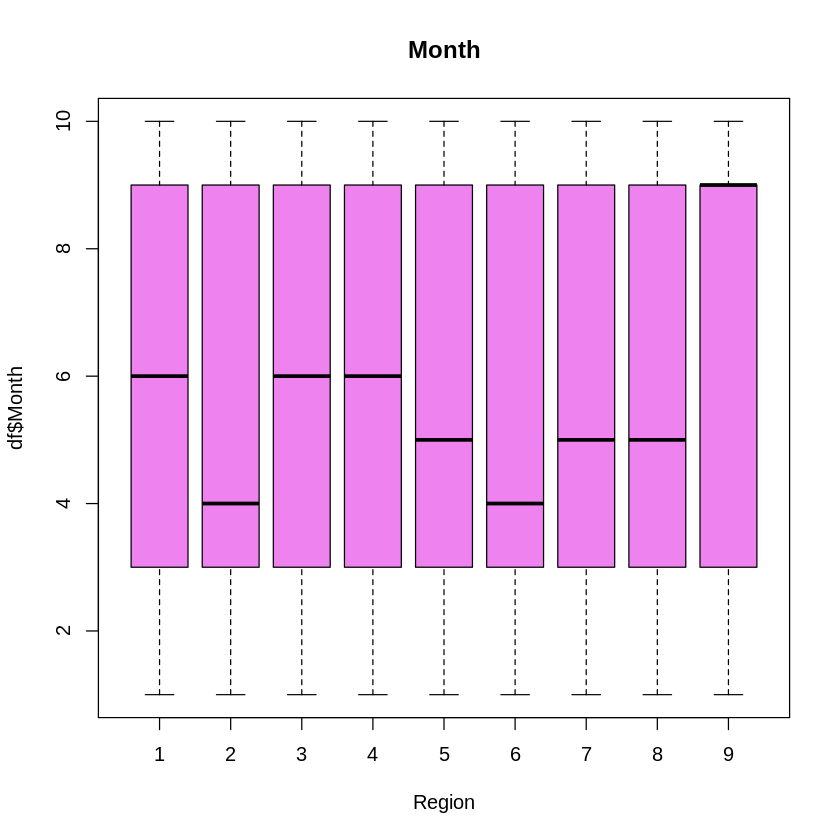

In [ ]:
boxplot(df$Month~Region, data = df, main="Month",col= "violet")

The customers are from region 1, 3, 4,  are highest in the month of september.respectively and only customers from 
 More efforts needs to be made in the region 2 and 6 to increase the revenue generation. 

In [215]:

library(dplyr)
x <- round(cor(select_if(df, is.numeric)), 2)
res <- cor(x)
corr <- round(res,2)
print(corr)

                        Administrative Administrative_Duration Informational
Administrative                    1.00                    0.88          0.66
Administrative_Duration           0.88                    1.00          0.58
Informational                     0.66                    0.58          1.00
Informational_Duration            0.52                    0.48          0.88
ProductRelated                    0.72                    0.60          0.65
ProductRelated_Duration           0.69                    0.62          0.67
BounceRates                      -0.68                   -0.59         -0.53
ExitRates                        -0.74                   -0.63         -0.57
PageValues                        0.16                    0.10          0.04
SpecialDay                       -0.40                   -0.37         -0.34
OperatingSystems                 -0.26                   -0.27         -0.30
Browser                          -0.26                   -0.26         -0.32

##Correlation

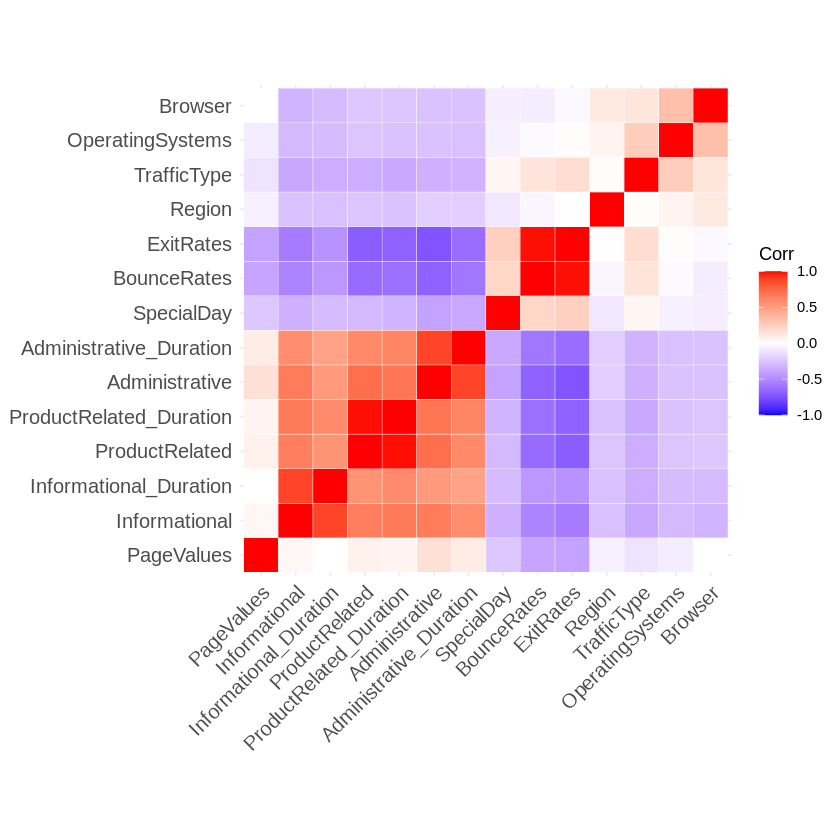

In [216]:
# using hierarchical clustering
ggcorrplot(corr, hc.order = TRUE, outline.col = "white")

Administrative Pages and Administrative Duration, Informational and Informational Duration, Product Related and Product Related Duration are positively correlated.Exit Rates and Bounce Rates are positively correlated with the correlation coefficient of 0.99.Exit Rates and Page Values are negatively correlated.Bounce Rates and Page Values are negatively correlated. 


##Covariance

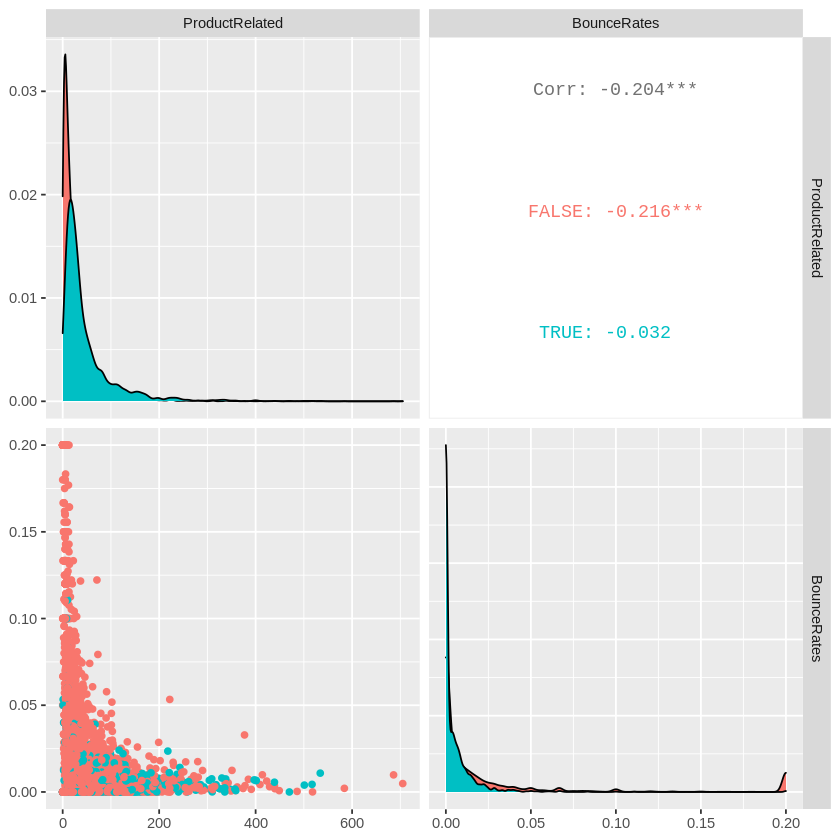

In [ ]:
#Use ggpairs to show pair plots
# reduce the columns being displayed

pair <- ggpairs(df, mapping = aes(color = Revenue), columns = c("ProductRelated", "BounceRates"))
pair

There is a very low negative correlation between these two columns.

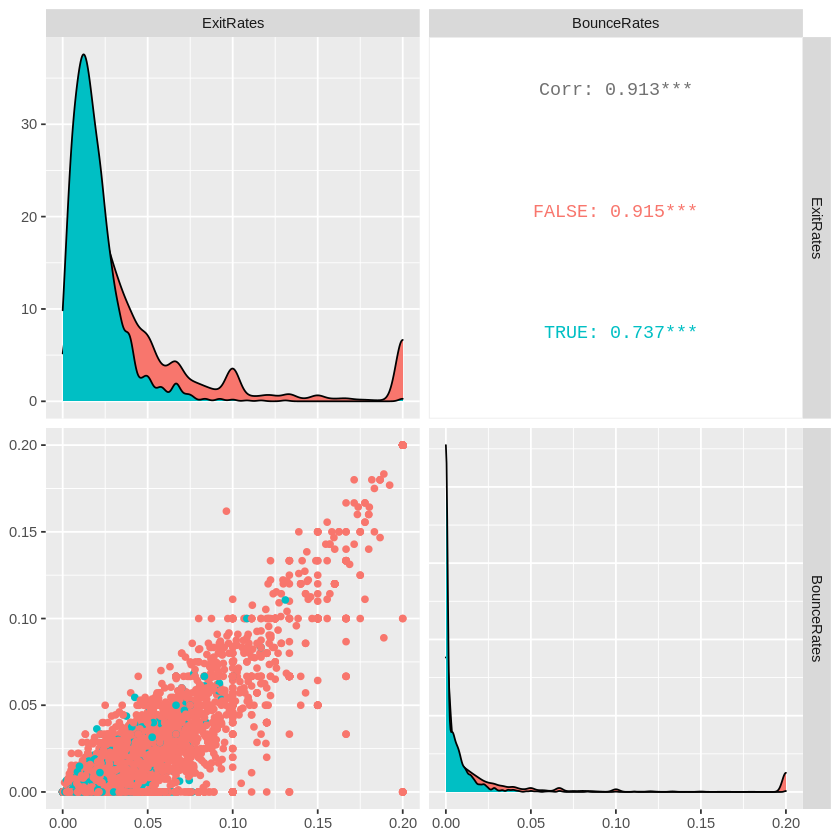

In [ ]:
pm <- ggpairs(df, mapping = aes(color = Revenue), columns = c("ExitRates", "BounceRates"))
pm

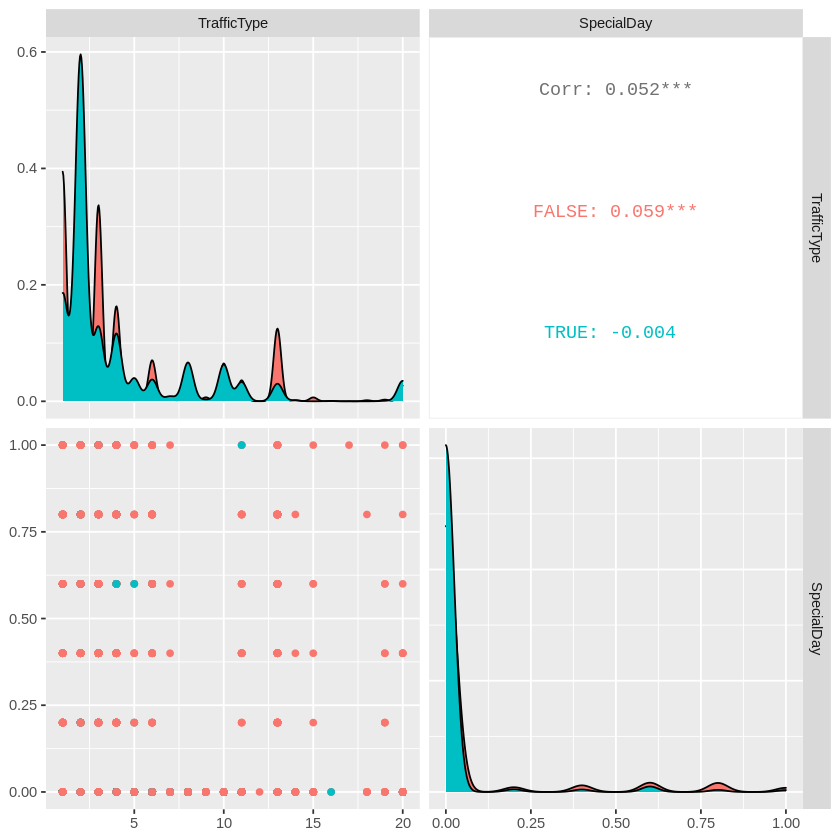

In [ ]:
pm <- ggpairs(df, mapping = aes(color = Revenue), columns = c("TrafficType", "SpecialDay"))
pm

From the plot above we see the correlation of the traffic type column and special day is  very low. From the scatter plots we can tell that the two are not linearly distributed.

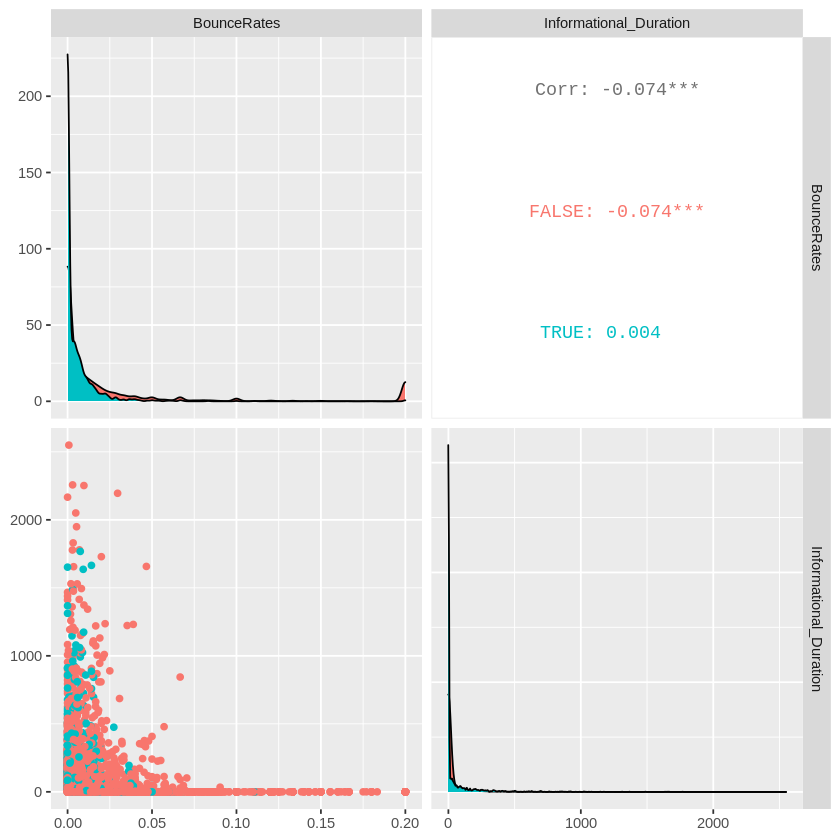

In [ ]:
pm <- ggpairs(df, mapping = aes(color = Revenue), columns = c("BounceRates", "Informational_Duration"))
pm

From the plot above we see the correlation of the information duration  column and bounce rates is very low. From the scatter plots we can tell that the two are  linearly related.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



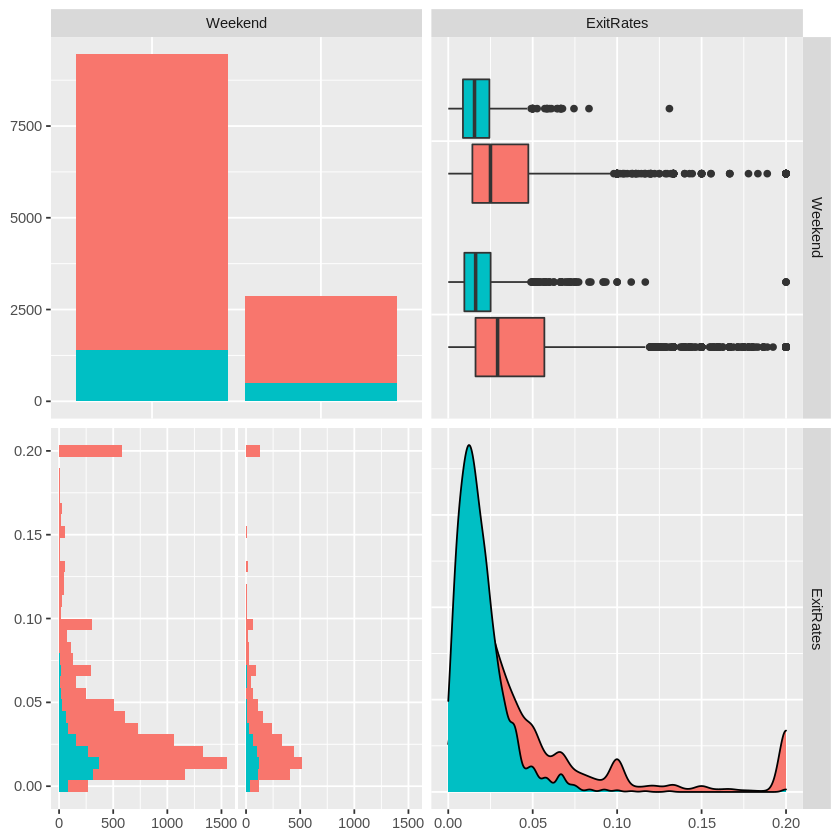

In [ ]:
pm <- ggpairs(df, mapping = aes(color = Revenue), columns = c("Weekend", "ExitRates"))
pm

Based on the data, it seems like customers/visitors like to shop on non-weekends more in comparison to weekends. 

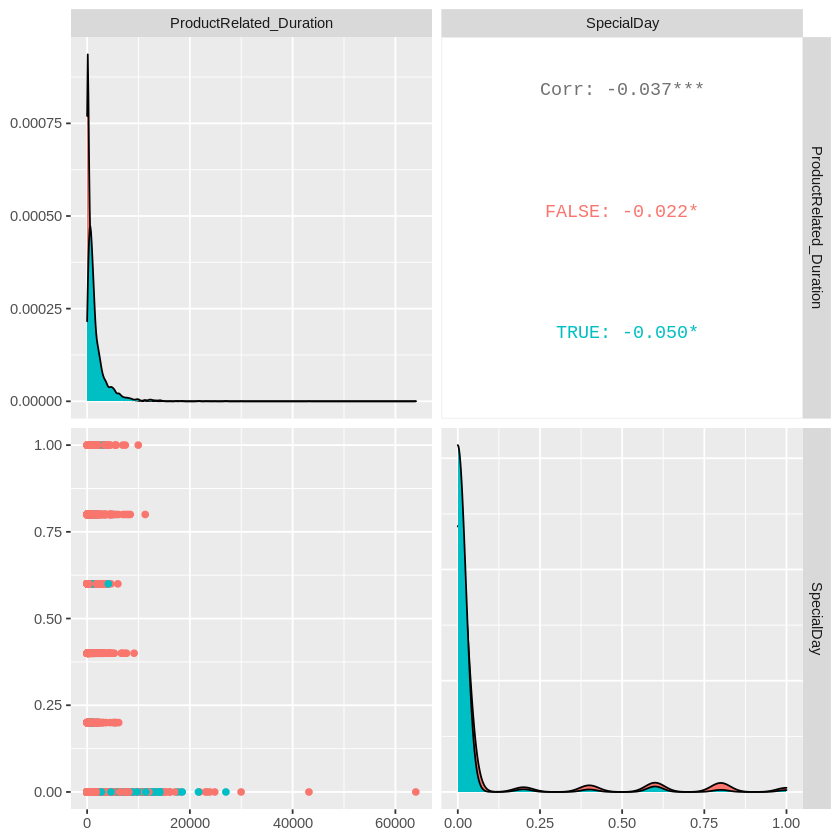

In [ ]:
pm <- ggpairs(df, mapping = aes(color = Revenue) ,columns = c("ProductRelated_Duration", "SpecialDay"))
pm


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



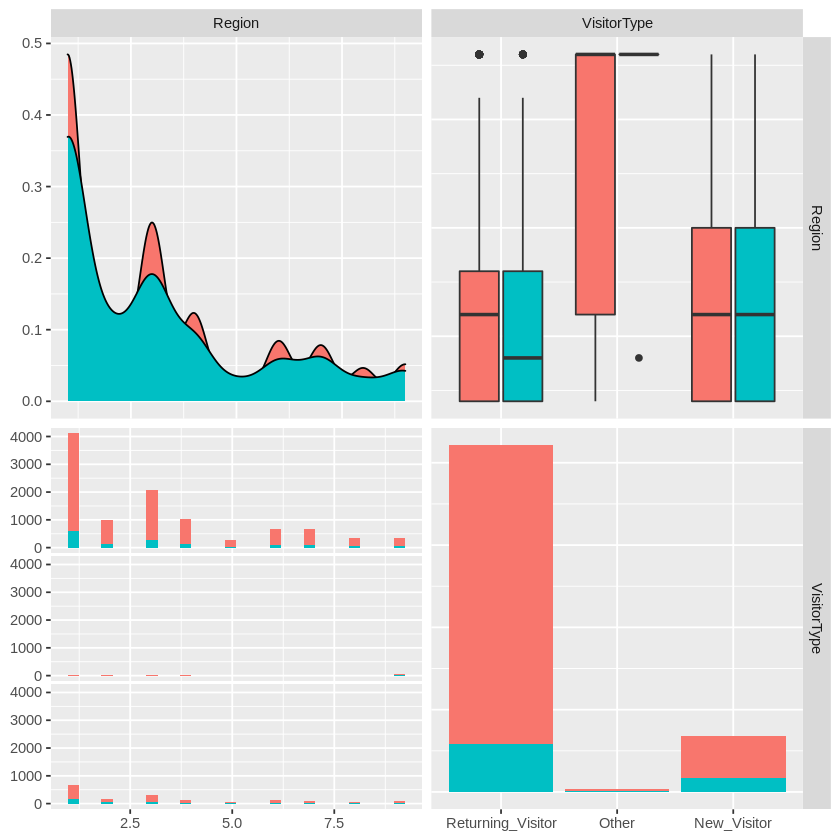

In [ ]:
pm <- ggpairs(df, mapping = aes(color = Revenue) ,columns = c("Region", "VisitorType"))
pm

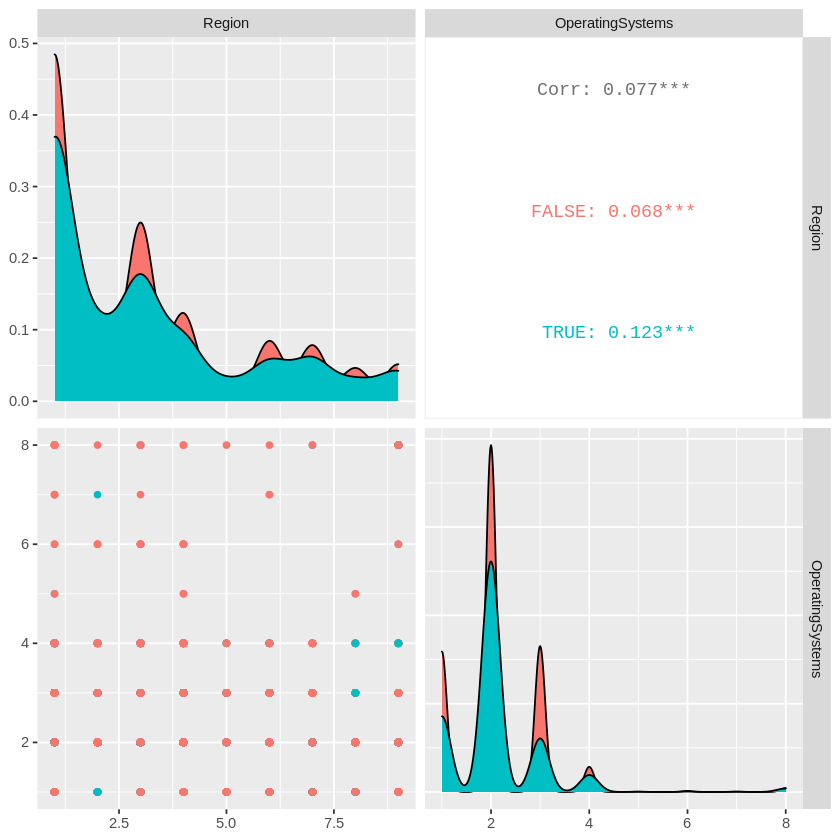

In [ ]:
pm <- ggpairs(df, mapping = aes(color = Revenue) ,columns = c("Region", "OperatingSystems"))
pm

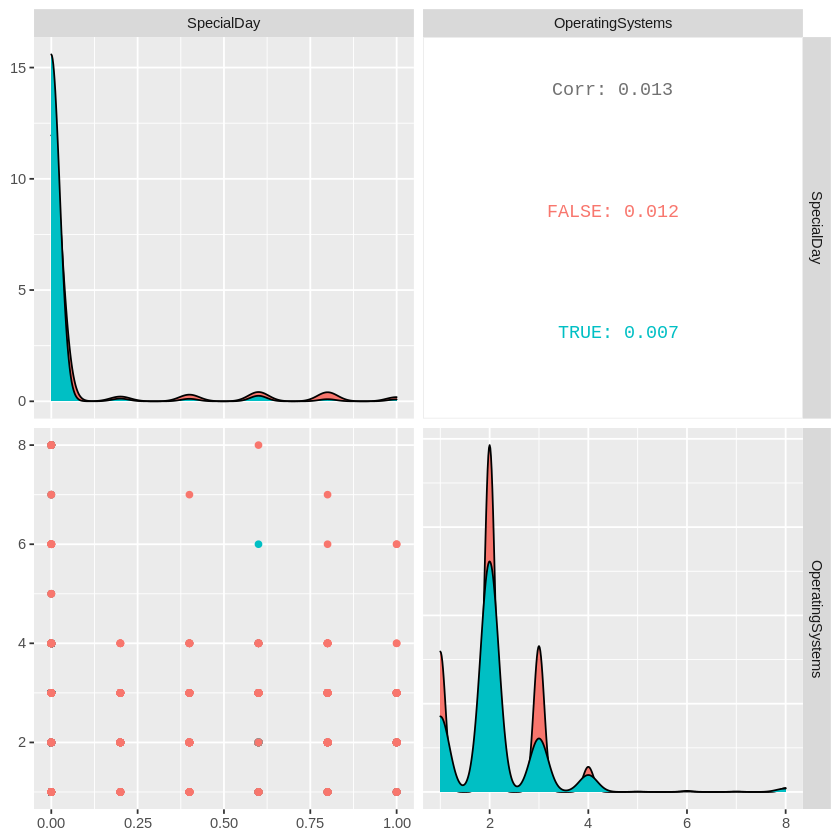

In [ ]:
pm <- ggpairs(df, mapping = aes(color = Revenue) ,columns = c("SpecialDay", "OperatingSystems"))
pm

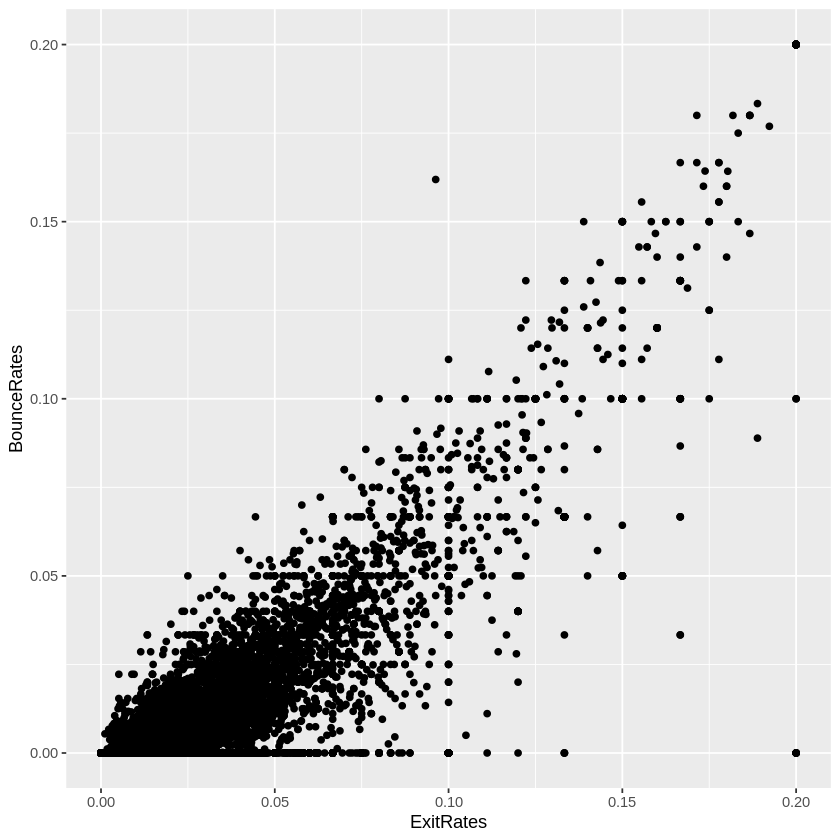

In [ ]:
# scatter plot between daily amount spent on the site vs the area income 
ggplot(data = df) + 
  geom_point(mapping = aes(x = ExitRates, y = BounceRates))

We can tell that the relationship between exit rates and bounce rates is linearly related.

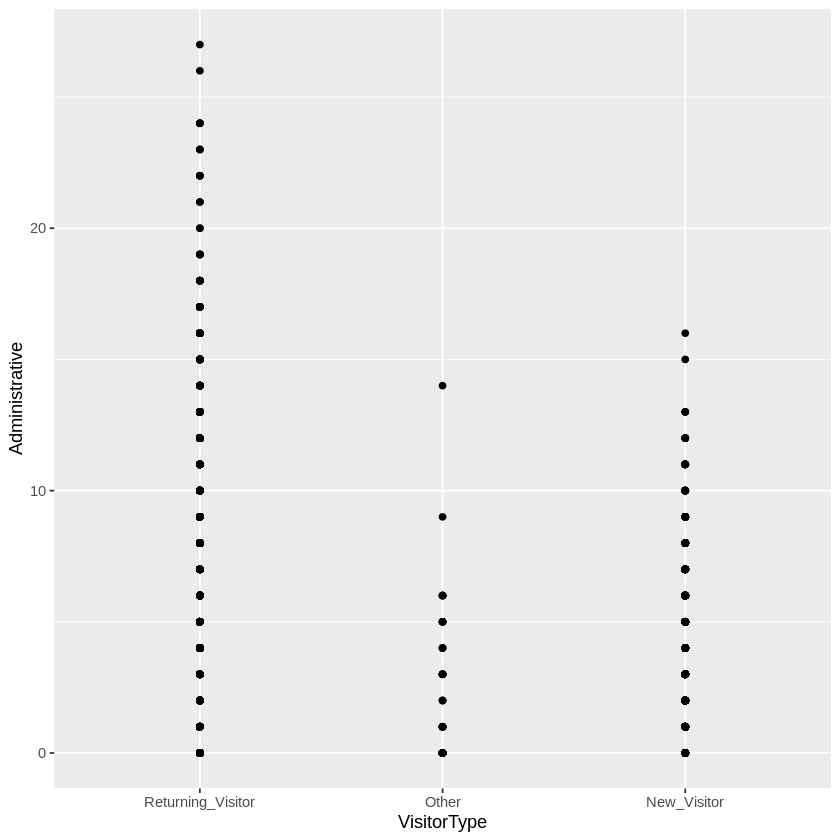

In [ ]:
ggplot(data = df) + 
  geom_point(mapping = aes(x = VisitorType, y = Administrative))

##Covariance

In [304]:
#finding out covariance between Information and informational duration

print(cov(df$Informational_Duration, df$Informational))   #printing covariance 

[1] 111.656


The covariance between these 2 variables is fairly high.

In [310]:
#finding outcovariance between browser and region
print(cov(df$Browser, df$Region))   #printing covariance 

[1] 0.3776251


In [311]:
#finding out covariance between Browser and Administrative column
print(cov(df$Browser, df$Administrative))   #printing covariance 

[1] -0.1467931


In [312]:
#finding out covariance between  and Administrative column
print(cov(df$Administrative_Duration, df$Administrative))   #printing covariance 

[1] 355.0342


The covariance is fairly high between these 2 columns

In [313]:
#finding out covariance between   Browser and page values.
print(cov(df$Browser, df$PageValues))   #printing covariance 

[1] 1.463173


The covariance between these 2 columns is very low.

In [319]:
#finding out covariance between Product related  and Product related_duration column
print(cov(df$ProductRelated_Duration, df$ProductRelated))   #printing covariance 

[1] 73668.63


The covariance between these 2 columns is very high. The number of different types of pages visited by visitor about product related pages increases as total amount of time (in seconds) spent by the visitor on product related pages increases.

In [321]:
#finding out covariance between Product related  and Product related_duration column
print(cov(df$`BounceRates`, df$`ExitRates`))   #printing covariance 

[1] 0.001896814


There is a low covariance between these 2 variables.

In [322]:
#finding out covariance between Exit Rates  and Product related_duration column
print(cov(df$ProductRelated_Duration, df$ExitRates))   #printing covariance 

[1] -21.7835


In [323]:
#finding out covariance between Bounce rates and special day column
print(cov(df$SpecialDay, df$BounceRates))   #printing covariance 

[1] 0.0007964769


In [324]:
#finding out covariance between Product related duration  and administrative duration column
print(cov(df$ProductRelated_Duration, df$Administrative_Duration))   #printing covariance 

[1] 120492.1


There is a very high covaraince between these 2 columns.The total amount of time (in seconds) spent by the visitor on account management related pages increases as total amount of time (in seconds) spent by the visitor on product related pages increases.

In [326]:
#finding out covariance between Product related   and  informational_duration column
print(cov(df$ProductRelated, df$Informational_Duration))   #printing covariance 

[1] 1760.651


The covariance between these 2 columns is fairly high.

In [327]:
#finding out covariance between browser  and administrative duration column
print(cov(df$Browser, df$Administrative_Duration))   #printing covariance 

[1] -4.808302


The covariance between the columns is negative

In [328]:
#finding out covariance between Product related duration  and operating systems
print(cov(df$ProductRelated_Duration, df$OperatingSystems))   #printing covariance 

[1] 4.83361


The covariance is very low.

In [329]:
#finding out covariance between Product related duration  and region column
print(cov(df$ProductRelated_Duration, df$Region))   #printing covariance 

[1] -160.8036


In [330]:
#finding out covariance between Informational duration  and operating systems column
print(cov(df$Informational_Duration, df$OperatingSystems))   #printing covariance 

[1] -1.250931


The covariance is very low.

#Multivariate Analysis

PCA

In [ ]:
#Let me normalize the variables since i have variable with unequal scales.
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

In [ ]:
## Creating a copy  data.
df_normalized <- df

In [ ]:
## Normalizing numerical variables.
df_normalized$Administrative <- normalize(df$Administrative)
df_normalized$Administrative_Duration <- normalize(df$Administrative_Duration)
df_normalized$Informational <- normalize(df$Informational_Duration)
df_normalized$Informational_Duration <- normalize(df$Administrative)
df_normalized$ProductRelated <- normalize(df$ProductRelated)
df_normalized$ProductRelated_Duration <- normalize(df$ProductRelated_Duration)
df_normalized$BounceRates <- normalize(df$BounceRates)
df_normalized$ExitRates <- normalize(df$ExitRates)
df_normalized$PageValues <- normalize(df$PageValues)
df_normalized$SpecialDay <- normalize(df$SpecialDay)

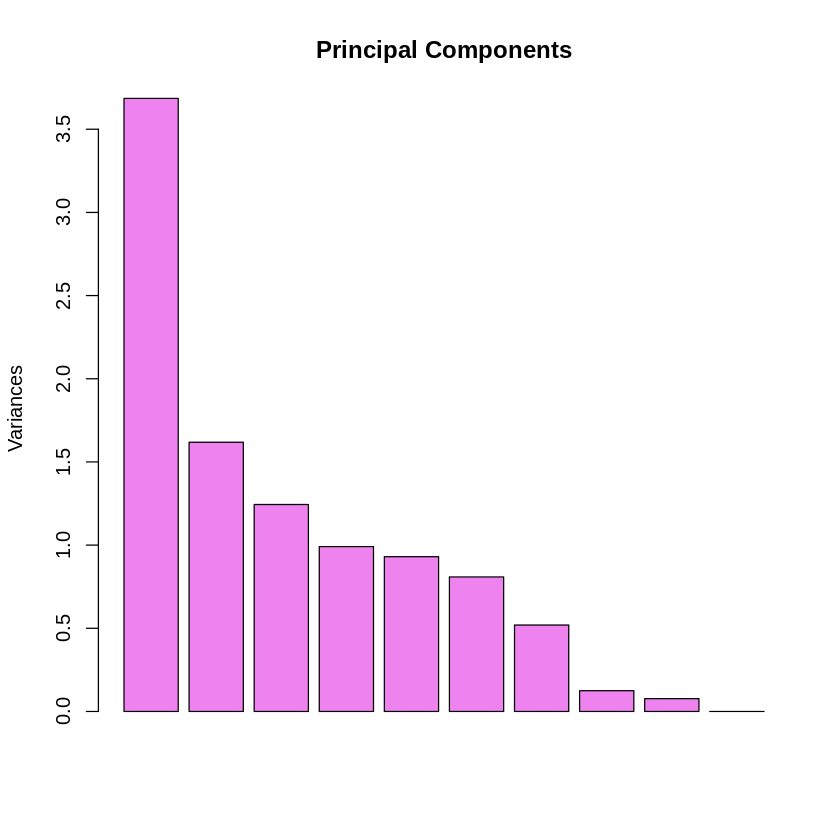

In [166]:

pca <- prcomp(df_normalized[c(1:10)], scale. = TRUE)
plot(pca, main = "Principal Components", col = "violet")

In [173]:
## Lets display first 10 principal components of the data frame. 
df_pca <- as.data.frame(pca_x$x)
head(df_pca[1:10], 10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.028392486,0.6722187,-2.20870134,1.141002911,-0.7512544,1.631115607,0.6346317,1.89182610,-0.209629053,0.04086363
2,0.141044874,-3.1406158,-0.25470269,-1.625253449,-0.6971947,-0.577515219,1.6133032,0.19447372,0.142831041,-0.23299354
3,0.037135907,0.6701388,-2.20875893,1.146200974,-0.7511850,1.631383000,0.6362977,1.88764119,-0.215961244,0.04564706
4,0.100718928,-2.7482782,-0.85326737,-1.256301178,-0.7125255,-0.128013188,1.8407697,0.71913822,0.056600926,-0.14173425
5,0.036106724,-0.5410677,-0.03709822,-0.002264277,-0.6953572,-0.021079379,-0.3333144,-0.05480480,0.007460177,-0.15700260
6,0.111234866,0.6359488,0.22588616,-0.220170528,-0.6880595,-0.002291326,-0.8315561,0.02801127,-0.490407739,-0.25445539
7,0.002845927,1.2728420,-0.86474540,1.739457705,-0.7347260,1.590747446,1.7827344,2.00965793,0.304833069,0.04933921
8,0.995332593,0.5715601,-2.19802547,1.216821927,-0.4582541,1.782264710,0.7119007,1.80747330,-0.255599895,0.81145666
9,0.078188274,-1.9234746,2.43557239,-0.459281586,-0.6641809,-0.659276023,3.9111650,0.44687278,1.172791662,-0.23132626


#Modelling

In [ ]:
#Lets first encode the variables.
install.packages("caret")
library(dplyr)
library(caret)
dmy <- dummyVars(" ~ .", data = df, fullRank = T)
data_new<- data.frame(predict(dmy, newdata = df))
glimpse(data_new)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Rows: 12,316
Columns: 38
$ Administrative          <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ Informational           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ ProductRelated          <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, …
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.0500…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.1400…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, …
$ Month.L                 <dbl> -0.4954337, -0.4954337, -0.4954337, -0.495433…
$ Month.Q                 <dbl> 0.522233, 0.522233, 0.522233, 0.522233, 0.522…
$ Month.C                 <

In [ ]:
# Previewing df_normalized 
# ---
#
head(df_normalized)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month_new,VisitorType_new
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<int>,<int>,<int>,<int>,<ord>,<lgl>,<lgl>,<ord>,<ord>
1,0,0.0002941393,0.0003920992,0,0.001418440,1.563122e-05,1.00000000,1.000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE,1,1
2,0,0.0002941393,0.0003920992,0,0.002836879,1.016029e-03,0.00000000,0.500000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE,1,1
3,0,0.0000000000,0.0000000000,0,0.001418440,0.000000e+00,1.00000000,1.000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE,1,1
4,0,0.0002941393,0.0003920992,0,0.002836879,5.731448e-05,0.25000000,0.700000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE,1,1
5,0,0.0002941393,0.0003920992,0,0.014184397,9.824223e-03,0.10000000,0.250000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE,1,1
6,0,0.0002941393,0.0003920992,0,0.026950355,2.426226e-03,0.07894737,0.122807,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE,1,1


#Hierachical clustering.

Hierarchical clustering is a powerful technique that allows you to build tree structures from data similarities. You can now see how different sub-clusters relate to each other, and how far apart data points are.

There are advantages to using hierarchical clustering.

1.We do not need to specify the number of clusters required for the algorithm.

2.Hierarchical clustering is easy to implement.

3.Hierarchical clustering outputs a hierarchy, ie a structure that is more informative than the unstructured set of flat clusters returned by k-means.


Disadvantages to using hierarchical clustering.

1.First, the algorithm can never undo any previous steps. So for example, the algorithm clusters 2 points, and later on we see that the connection was not a good one, the program cannot undo that step.

2.Second, the time complexity for the clustering can result in very long computation times, in comparison with efficient algorithms, such k-Means.

3.Finally, if we have a large dataset, it can become difficult to determine the correct number of clusters by the dendrogram.


In [192]:
# We now use the R function hclust() for hierarchical clustering

 #First we use the dist() function to compute the Euclidean distance between observations, 
# d will be the first argument in the hclust() function dissimilarity matrix
# ---
#
d <- dist(df_normalized, method = "euclidean")

# We then hierarchical clustering using the Ward's method
# ---
# 
res.hc <- hclust(d, method = "ward.D2" )

Warning message in dist(df_normalized, method = "euclidean"):
“NAs introduced by coercion”


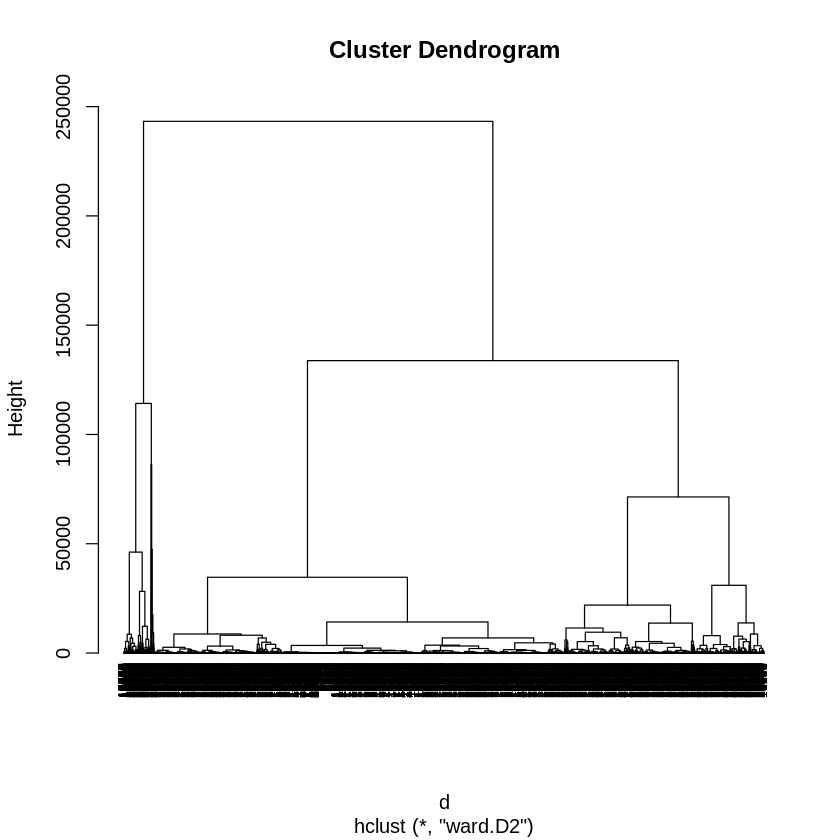

In [331]:
#Lastly, we plot the obtained dendrogram
# ---
# 
plot(res.hc, cex = 0.6, hang = -1)

One of the limitations of the hierachical clustering algorithm is  if we have a large dataset, it can become difficult to determine the correct number of clusters by the dendrogram.It is because we have very many variables, hence there is overlapping.

In [335]:
#Lets determine an optimal k
install.packages("factoextra")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [337]:
library(factoextra)
library(ggplot2)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Warning message in stats::dist(x):
“NAs introduced by coercion”
Warning message in stats::dist(x, method = method, ...):
“NAs introduced by coercion”
Warning message in stats::dist(x, method = method, ...):
“NAs introduced by coercion”
Warning message in stats::dist(x, method = method, ...):
“NAs introduced by coercion”
Warning message in stats::dist(x, method = method, ...):
“NAs introduced by coercion”
Warning message in stats::dist(x, method = method, ...):
“NAs introduced by coercion”
Warning message in stats::dist(x, method = method, ...):
“NAs introduced by coercion”
Warning message in stats::dist(x, method = method, ...):
“NAs introduced by coercion”
Warning message in stats::dist(x, method = method, ...):
“NAs introduced by coercion”
Warning message in stats::dist(x, method = method, ...):
“NAs introduced by coercion”


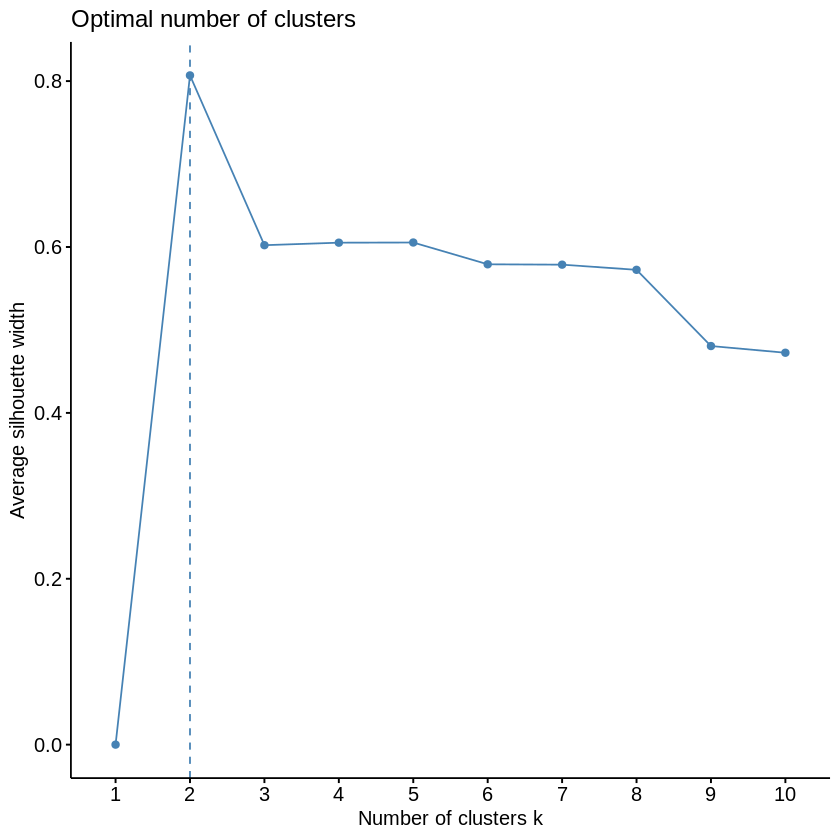

In [338]:
fviz_nbclust(df_normalized, FUN = hcut, method= "silhouette", kmax =8)

From the plot optimal number of k are 2.

#K Means Clustering



In [380]:
df_clust <-df_normalized[-c(1:2,17:18)]
#df_normalized.class<- df_normalized[, "Revenue"]
summary(df_clust)

 Informational    Informational_Duration ProductRelated  
 Min.   : 0.000   Min.   :  -1.00        Min.   :  0.00  
 1st Qu.: 0.000   1st Qu.:   0.00        1st Qu.:  7.00  
 Median : 0.000   Median :   0.00        Median : 18.00  
 Mean   : 0.504   Mean   :  34.51        Mean   : 31.76  
 3rd Qu.: 0.000   3rd Qu.:   0.00        3rd Qu.: 38.00  
 Max.   :24.000   Max.   :2549.38        Max.   :705.00  
                                                         
 ProductRelated_Duration  BounceRates         ExitRates         PageValues     
 Min.   :   -1.0         Min.   :0.000000   Min.   :0.00000   Min.   :  0.000  
 1st Qu.:  185.0         1st Qu.:0.000000   1st Qu.:0.01429   1st Qu.:  0.000  
 Median :  599.8         Median :0.003119   Median :0.02512   Median :  0.000  
 Mean   : 1196.0         Mean   :0.022152   Mean   :0.04300   Mean   :  5.896  
 3rd Qu.: 1466.5         3rd Qu.:0.016684   3rd Qu.:0.05000   3rd Qu.:  0.000  
 Max.   :63973.5         Max.   :0.200000   Max.   :0.20

In [381]:
str(df_clust)

'data.frame':	12316 obs. of  16 variables:
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Ord.factor w/ 10 levels "Feb"<"Mar"<"May"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Ord.factor w/ 3 levels "Returning_Visitor"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Month_new              : Ord.factor w/ 10 levels "1"<"2"<"3"<

In [ ]:
# Applying the K-means clustering algorithm with no. of centroids(k)=2
# ---
# 
#result<- kmeans(df_clust) 
result <- kmeans(df_clust, centers = 2, iter.max = 100)
# 
result$size 

In [340]:
# Getting the value of cluster center datapoint value(3 centers for k=2)
# ---
# 
result$centers 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType_new
1,5.624866,207.73068,1.755627,146.3098,135.47481,6093.2140,0.006524418,0.02077043,7.345740,0.04587353,2.145766,2.366559,2.900322,3.592712,1.039657
2,2.046736,70.51109,0.401388,25.3425,23.26329,794.6432,0.023433404,0.04482478,5.777121,0.06277783,2.122375,2.356848,3.168321,4.109637,1.301854


In [341]:
# Getting the cluster vector that shows the cluster where each record falls
# ---
# 
result$cluster
# Let’s see how clustering has performed on Wind and Temp attributes.

1     2     3     4     5     6     7     8     9    10    11    12    13 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    2     1     2     2     2     2     2     2     2     2     2     2     2 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    2     1     2     2     2     2     2     2     2     2     2     2     2 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    2     2     2     2     2     1     2     2     2     2     2     2     2 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  157   158   159   160   161   162   163   164   165   166   167   168   169 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  170   171   172   173   174   175   176   177   178   179   180   181   182 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  183   184   185   186   187   188   189   190   191   192   193   194   195 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  196   197   198   199   200   201   202   203   204   205   206   207   208 
    1     2     2     2     2     2     2     2     2     2     2     2     2 
  209   210   211   212   213   214   215   216   217   218   219   220   221 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  222   223   224   225   226   227   228   229   230   231   232   233   234 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  235   236   237   238   239   240   241   242   243   244   245   246   247 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  248   249   250   251   252   253   254   255   256   257   258   259   260 
    2     2     2     2     1     2     2     2     2     2     2     2     2 
  261   262   263   264   265   266   267   268   269   270   271   272   273 
    2     2     2     2     2     1     2     2     2     2     2     2     2 
  274   275   276   277   278   279   280   281   282   283   284   285   286 
    2     2     2     2     1     2     2     2     2     2     2     2     2 
  287   288   289   290   291   292   293   294   295   296   297   298   299 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  300   301   302   303   304   305   306   307   308   309   310   311   312 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  313   314   315   316   317   318   319   320   321   322   323   324   325 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  326   327   328   329   330   331   332   333   334 

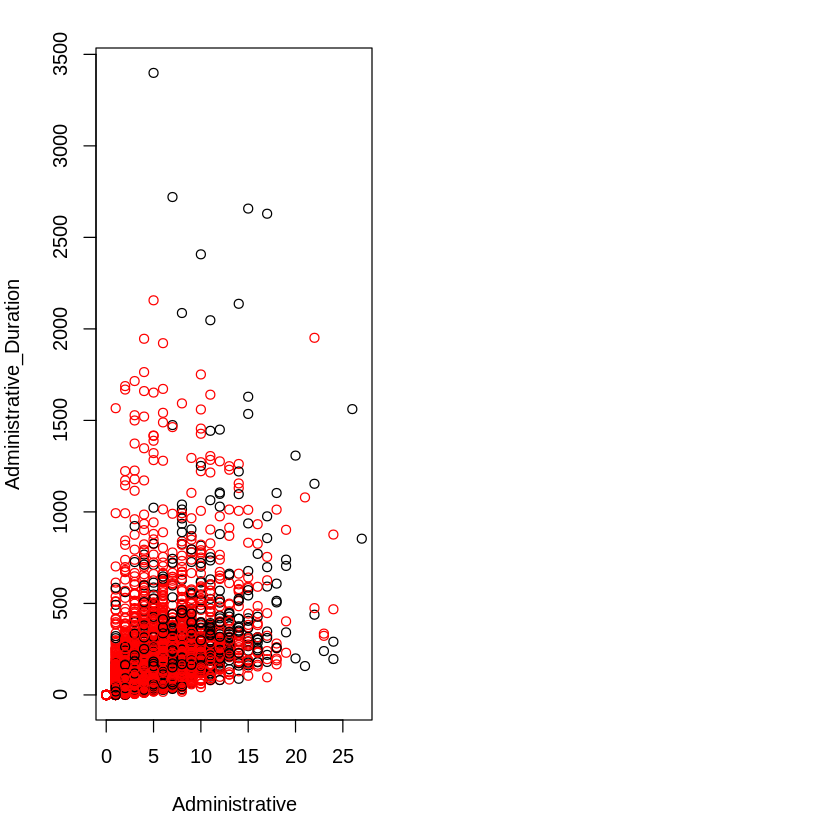

In [342]:
# Visualizing the  clustering results
# ---
# 
par(mfrow = c(1,2), mar = c(5,4,2,2))

# Plotting to see how administative and administrative_duration data points have been distributed in clusters
# ---
#
plot(df_clust[,1:2], col = result$cluster) 

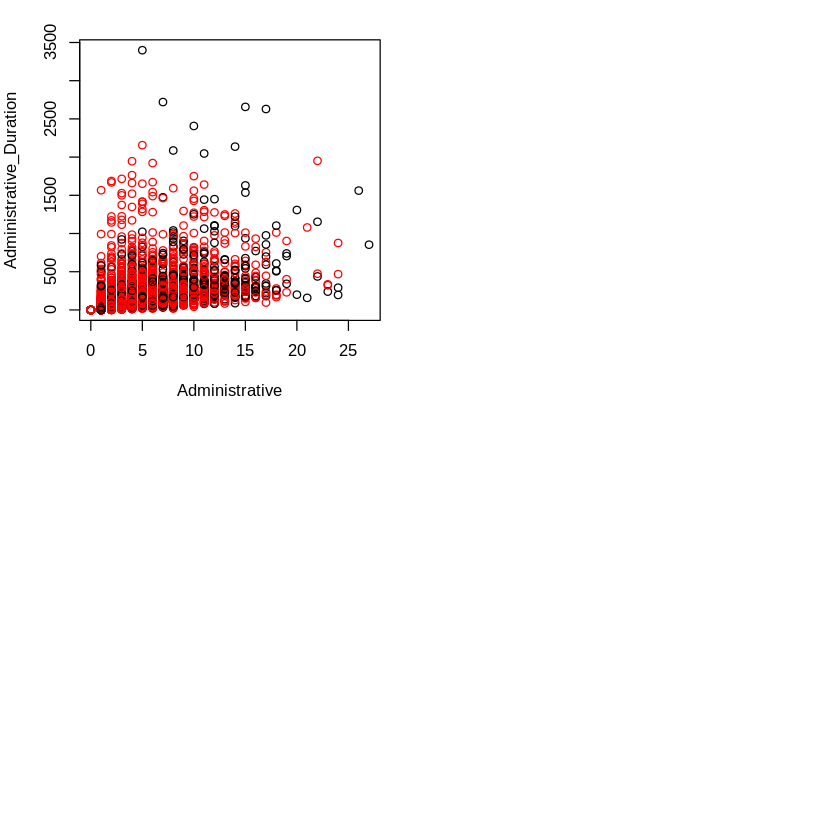

In [343]:
# Verifying the results of clustering
# 
par(mfrow = c(2,2), mar = c(5,4,2,2))

# Plotting to see how administrative and administrative data points have been distributed in clusters
plot(df_clust[c(1,2)], col = result$cluster)


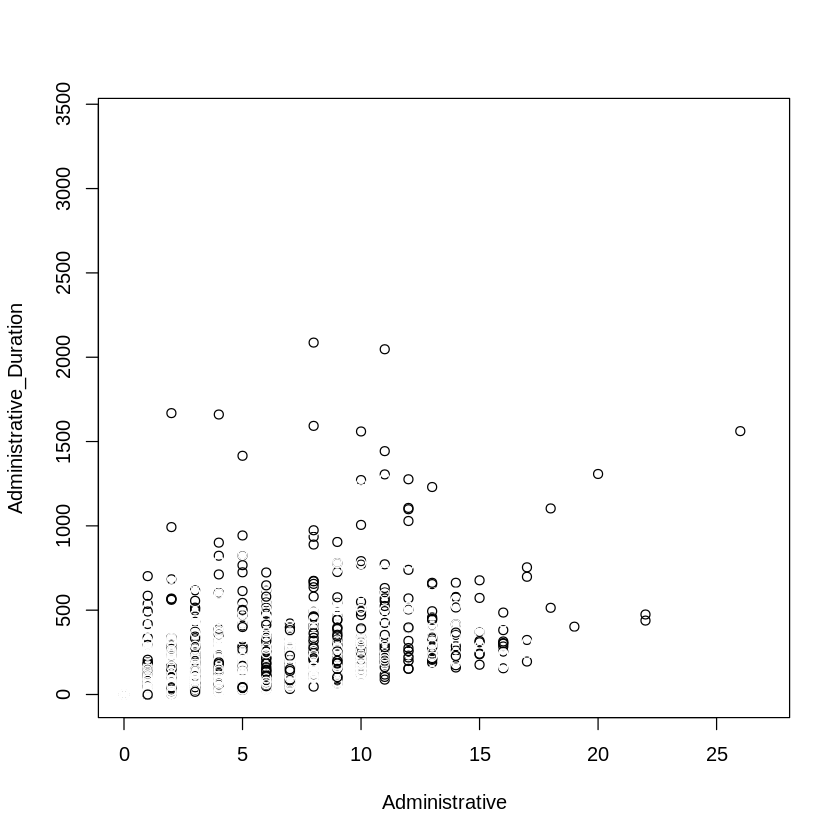

In [344]:
# Plotting to see how administrative duration and administrative  data points have been distributed 
# originally as per "class" attribute in dataset
# ---
#
plot(df_clust[c(1,2)], col = df_normalized.class)

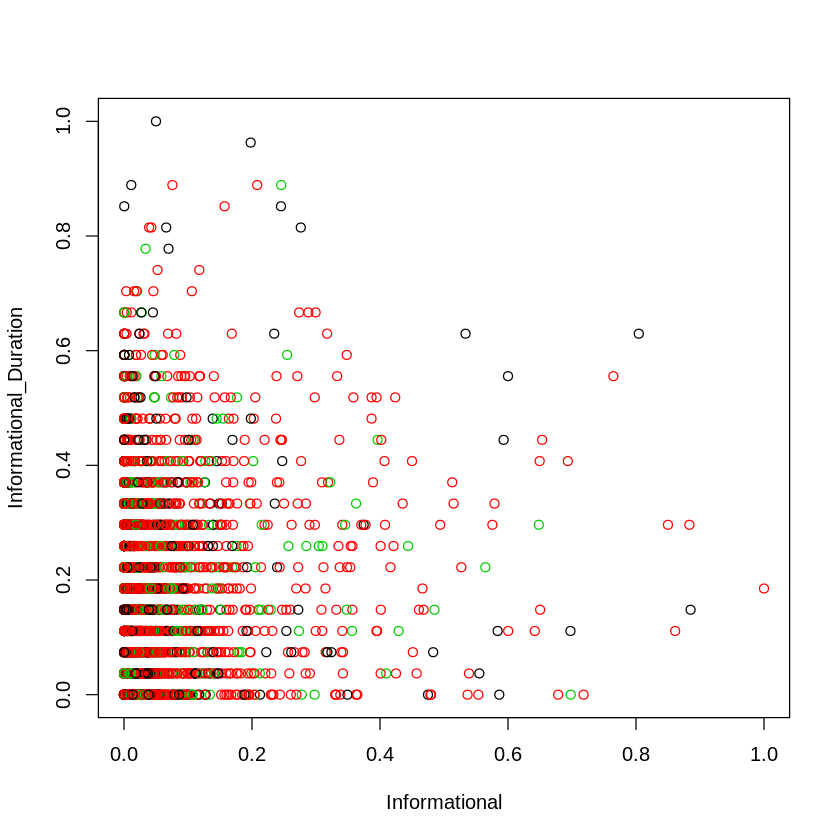

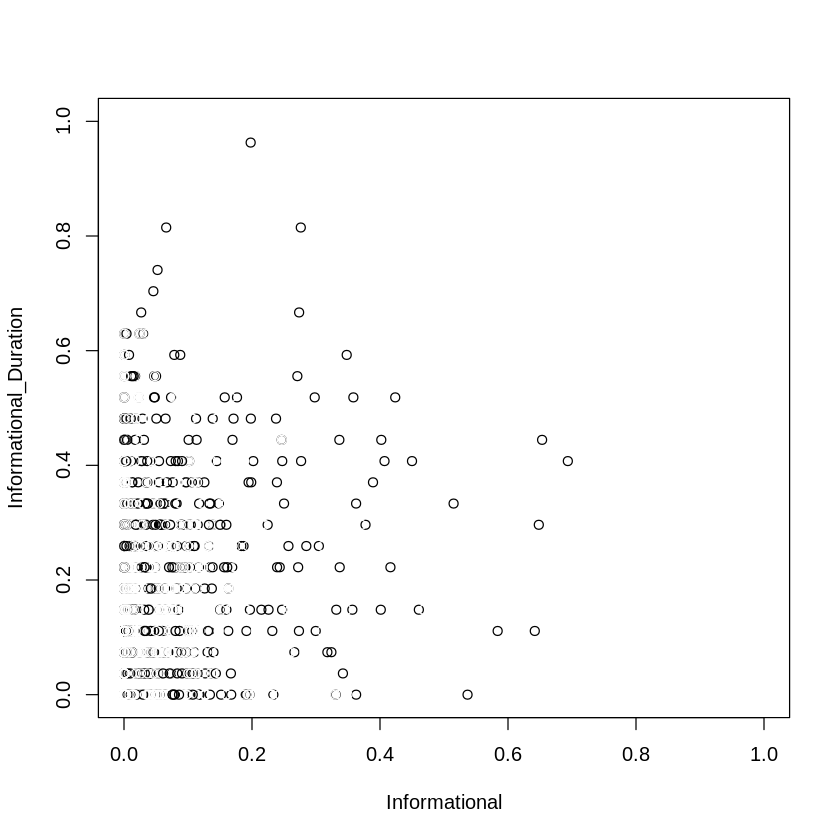

In [ ]:
# Plotting to see how informational_duration and informationl data points have been distributed in clusters
# ---
# 
plot(df_clust[c(3,4)], col = result$cluster)
plot(df_clust[c(3,4)], col = df_normalized.class)


In [386]:
# Between cluster sum of squares
result$betweenss

[1] 24249248205

In [387]:
## Whithin clusters sum of squares
result$betweenss / result$totss

[1] 0.5295656

Within cluster sum of squares by cluster: (between_SS / total_SS = 52 %)

Suggests the model is not too accurate at prediction.

###Conclusion

1.Traffic Types: 12, 15, 17, & 18 genreated no revenue from the EDA analysis.

2.The Bounce rate can be different depending on the source of traffic hence it’s likely that search traffic will produce a low bounce rate.

3.Region 1 and 3. had the highest bounce rate.Average bounce rate value of the pages visited by the visitor.

4.Even though customers/visitors have spent a large amount of time on product related pages but the revenue generation is very low. 

5.With increasing Page Values, the revenue generation is more. There are certain pages which have very less page values which need to be improved in order to generate revenue.

6.In hierachical clustering  the dendogram plot was very messy and no conclusions can be drawn from the plot.Perhaps dimension reduction is required since features are too many.
 








## 7. Follow up questions

1. Did we have the right data? **Yes we did**

2. Did we have the right question? **Yes we did**

3. Do we need to do anything else to answer the question? **Yes we would need to have a regression or classification algorithm that helps us identify patterns and characteristics of those that click on the ad to better identify individuals who click on the ad.**